# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')

In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

# I'm checking the data in the 2 cells below
azdias.index[0]

0

In [4]:
feat_info

attribute information_level         type missing_or_unknown
0                AGER_TYP            person  categorical             [-1,0]
1    ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]
2               ANREDE_KZ            person  categorical             [-1,0]
3           CJT_GESAMTTYP            person  categorical                [0]
4       FINANZ_MINIMALIST            person      ordinal               [-1]
5           FINANZ_SPARER            person      ordinal               [-1]
6        FINANZ_VORSORGER            person      ordinal               [-1]
7          FINANZ_ANLEGER            person      ordinal               [-1]
8   FINANZ_UNAUFFAELLIGER            person      ordinal               [-1]
9        FINANZ_HAUSBAUER            person      ordinal               [-1]
10              FINANZTYP            person  categorical               [-1]
11            GEBURTSJAHR            person      numeric                [0]
12        GFK_URLAUBERTYP            person  categorical                 []
13       GREEN_AVANTGARDE            person  categorical                 []
14             HEALTH_TYP            person      ordinal             [-1,0]
15    LP_LEBENSPHASE_FEIN            person        mixed                [0]
16    LP_LEBENSPHASE_GROB            person        mixed                [0]
17        LP_FAMILIE_FEIN            person  categorical                [0]
18        LP_FAMILIE_GROB            person  categorical                [0]
19         LP_STATUS_FEIN            person  categorical                [0]
20         LP_STATUS_GROB            person  categorical                [0]
21       NATIONALITAET_KZ            person  categorical             [-1,0]
22  PRAEGENDE_JUGENDJAHRE            person        mixed             [-1,0]
23         RETOURTYP_BK_S            person      ordinal                [0]
24              SEMIO_SOZ            person      ordinal             [-1,9]
25              SEMIO_FAM            person      ordinal             [-1,9]
26              SEMIO_REL            person      ordinal             [-1,9]
27              SEMIO_MAT            person      ordinal             [-1,9]
28             SEMIO_VERT            person      ordinal             [-1,9]
29             SEMIO_LUST            person      ordinal             [-1,9]
..                    ...               ...          ...                ...
55            OST_WEST_KZ          building  categorical               [-1]
56               WOHNLAGE          building        mixed               [-1]
57        CAMEO_DEUG_2015     microcell_rr4  categorical             [-1,X]
58         CAMEO_DEU_2015     microcell_rr4  categorical               [XX]
59        CAMEO_INTL_2015     microcell_rr4        mixed            [-1,XX]
60            KBA05_ANTG1     microcell_rr3      ordinal               [-1]
61            KBA05_ANTG2     microcell_rr3      ordinal               [-1]
62            KBA05_ANTG3     microcell_rr3      ordinal               [-1]
63            KBA05_ANTG4     microcell_rr3      ordinal               [-1]
64           KBA05_BAUMAX     microcell_rr3        mixed             [-1,0]
65              KBA05_GBZ     microcell_rr3      ordinal             [-1,0]
66               BALLRAUM          postcode      ordinal               [-1]
67               EWDICHTE          postcode      ordinal               [-1]
68             INNENSTADT          postcode      ordinal               [-1]
69     GEBAEUDETYP_RASTER        region_rr1      ordinal                 []
70                    KKK        region_rr1      ordinal             [-1,0]
71             MOBI_REGIO        region_rr1      ordinal                 []
72      ONLINE_AFFINITAET        region_rr1      ordinal                 []
73               REGIOTYP        region_rr1      ordinal             [-1,0]
74       KBA13_ANZAHL_PKW    macrocell_plz8      numeric                 []
75             PLZ8_ANTG1    macrocell_plz8      ordinal        

In [5]:
# I'm checking the heading in the 2 cells below
azdias.head()

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0        -1                     2          1            2.0   
1        -1                     1          2            5.0   
2        -1                     3          2            3.0   
3         2                     4          2            2.0   
4        -1                     3          1            5.0   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                  3              4                 3               5   
1                  1              5                 2               5   
2                  1              4                 1               2   
3                  4              2                 5               2   
4                  4              3                 4               1   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER    ...     PLZ8_ANTG1  PLZ8_ANTG2  \
0                      5                 3    ...            NaN         NaN   
1                      4                 5    ...            2.0         3.0   
2                      3                 5    ...            3.0         3.0   
3                      1                 2    ...            2.0         2.0   
4                      3                 2    ...            2.0         4.0   

   PLZ8_ANTG3  PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  ARBEIT  \
0         NaN         NaN          NaN       NaN       NaN     NaN   
1         2.0         1.0          1.0       5.0       4.0     3.0   
2         1.0         0.0          1.0       4.0       4.0     3.0   
3         2.0         0.0          1.0       3.0       4.0     2.0   
4         2.0         1.0          2.0       3.0       3.0     4.0   

   ORTSGR_KLS9  RELAT_AB  
0          NaN       NaN  
1          5.0       4.0  
2          5.0       2.0  
3          3.0       3.0  
4          6.0       5.0  

[5 rows x 85 columns]

In [6]:
feat_info.head()

attribute information_level         type missing_or_unknown
0              AGER_TYP            person  categorical             [-1,0]
1  ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]
2             ANREDE_KZ            person  categorical             [-1,0]
3         CJT_GESAMTTYP            person  categorical                [0]
4     FINANZ_MINIMALIST            person      ordinal               [-1]

In [7]:
# I'm checking the .describe() function in the 2 cells below
azdias.describe()

AGER_TYP  ALTERSKATEGORIE_GROB      ANREDE_KZ  CJT_GESAMTTYP  \
count  891221.000000         891221.000000  891221.000000  886367.000000   
mean       -0.358435              2.777398       1.522098       3.632838   
std         1.198724              1.068775       0.499512       1.595021   
min        -1.000000              1.000000       1.000000       1.000000   
25%        -1.000000              2.000000       1.000000       2.000000   
50%        -1.000000              3.000000       2.000000       4.000000   
75%        -1.000000              4.000000       2.000000       5.000000   
max         3.000000              9.000000       2.000000       6.000000   

       FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
count      891221.000000  891221.000000     891221.000000   891221.000000   
mean            3.074528       2.821039          3.401106        3.033328   
std             1.321055       1.464749          1.322134        1.529603   
min             1.000000       1.000000          1.000000        1.000000   
25%             2.000000       1.000000          3.000000        2.000000   
50%             3.000000       3.000000          3.000000        3.000000   
75%             4.000000       4.000000          5.000000        5.000000   
max             5.000000       5.000000          5.000000        5.000000   

       FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER      ...          PLZ8_ANTG1  \
count          891221.000000     891221.000000      ...       774706.000000   
mean                2.874167          3.075121      ...            2.253330   
std                 1.486731          1.353248      ...            0.972008   
min                 1.000000          1.000000      ...            0.000000   
25%                 2.000000          2.000000      ...            1.000000   
50%                 3.000000          3.000000      ...            2.000000   
75%                 4.000000          4.000000      ...            3.000000   
max                 5.000000          5.000000      ...            4.000000   

          PLZ8_ANTG2     PLZ8_ANTG3     PLZ8_ANTG4    PLZ8_BAUMAX  \
count  774706.000000  774706.000000  774706.000000  774706.000000   
mean        2.801858       1.595426       0.699166       1.943913   
std         0.920309       0.986736       0.727137       1.459654   
min         0.000000       0.000000       0.000000       1.000000   
25%         2.000000       1.000000       0.000000       1.000000   
50%         3.000000       2.000000       1.000000       1.000000   
75%         3.000000       2.000000       1.000000       3.000000   
max         4.000000       3.000000       2.000000       5.000000   

            PLZ8_HHZ       PLZ8_GBZ         ARBEIT    ORTSGR_KLS9  \
count  774706.000000  774706.000000  794005.000000  794005.000000   
mean        3.612821       3.381087       3.167854       5.293002   
std         0.973967       1.111598       1.002376       2.303739   
min         1.000000       1.000000       1.000000       0.000000   
25%         3.000000       3.000000       3.000000       4.000000   
50%         4.000000       3.000000       3.000000       5.000000   
75%         4.000000       4.000000       4.000000       7.000000   
max         5.000000       5.000000       9.000000       9.000000   

           RELAT_AB  
count  794005.00000  
mean        3.07222  
std         1.36298  
min         1.00000  
25%         2.00000  
50%         3.00000  
75%         4.00000  
max         9.00000  

[8 rows x 81 columns]

In [8]:
feat_info.describe()

attribute information_level     type missing_or_unknown
count            85                85       85                 85
unique           85                 9        5                  9
top     KBA05_ANTG3            person  ordinal               [-1]
freq              1                43       49                 26

In [9]:
# plot the data here later?
# plt.plot() ??

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [10]:
#I was trying to figure out what kind of data is missing below, not important.
# for i in azdias['CAMEO_DEU_2015']:
#     if i == "XX":
#         print(i)
# print("DONE")
# np.argwhere(np.isnan(feat_info_np))

In [11]:
def convert(word):
    temp = word.replace('[', '')
    temp = temp.replace(']', '')
#     temp = temp.replace(',', '')
    temp = temp.split(",")
    return temp

In [12]:
# Identify missing or unknown data values and convert them to NaNs.


# Moving through the whole missing_or_unknown column
for i in range(len(feat_info['missing_or_unknown'])):
#     print(i)
#     print(feat_info['missing_or_unknown'][i])
    # convert(word) basically removes the brackets and returns a list of items split by ",". Saved the list in converted
    converted = convert(feat_info['missing_or_unknown'][i])
    print(converted)
    
    # Getting the column name to use in azdias DataFrame
    for j in feat_info['attribute']:
        # For each value I want to replace, given from "converted" above
        for value in converted:
            try:
                value = int(value)
            except:
                None
            
            # Replace the value to NaN
            azdias[j] = azdias[j].replace(value, np.NaN)
        

print(azdias)


['-1', '0']
['-1', '0', '9']
['-1', '0']
['0']
['-1']
['-1']
['-1']
['-1']
['-1']
['-1']
['-1']
['0']
['']
['']
['-1', '0']
['0']
['0']
['0']
['0']
['0']
['0']
['-1', '0']
['-1', '0']
['0']
['-1', '9']
['-1', '9']
['-1', '9']
['-1', '9']
['-1', '9']
['-1', '9']
['-1', '9']
['-1', '9']
['-1', '9']
['-1', '9']
['-1', '9']
['-1', '9']
['-1', '9']
['-1', '9']
['-1']
['-1']
['-1', '0']
['-1']
['-1', '9']
['0']
['']
['']
['-1', '0']
['-1']
['-1', '0']
['-1', '0']
['0']
['']
['-1', '0']
['']
['0']
['-1']
['-1']
['-1', 'X']
['XX']
['-1', 'XX']
['-1']
['-1']
['-1']
['-1']
['-1', '0']
['-1', '0']
['-1']
['-1']
['-1']
['']
['-1', '0']
['']
['']
['-1', '0']
['']
['-1']
['-1']
['-1']
['-1']
['-1', '0']
['-1']
['-1']
['-1', '9']
['-1', '0']
['-1', '9']
        AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0            NaN                   2.0          1            2.0   
1            NaN                   1.0          2            5.0   
2            NaN                   3.0         

In [13]:
# Checking in a column to make sure convertion worked
for i in azdias['CAMEO_DEU_2015']:
    if i == "XX":
        print(i)
        # Nothing printed, so it worked, value XX is converted to NaN.

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [14]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

dic_attr_NaN = {}
for column in feat_info['attribute']:
    n_NaN = 0
    for i in azdias[column]:
        if pd.isna(i):
            n_NaN += 1
        dic_attr_NaN[column] = n_NaN
    print(f"In the column {column}, there's {n_NaN} NaN values.\n")
# plt.hist(azdias['CAMEO_DEU_2015'])
print(dic_attr_NaN)

In the column AGER_TYP, there's 685843 NaN values.

In the column ALTERSKATEGORIE_GROB, there's 2881 NaN values.

In the column ANREDE_KZ, there's 0 NaN values.

In the column CJT_GESAMTTYP, there's 4854 NaN values.

In the column FINANZ_MINIMALIST, there's 0 NaN values.

In the column FINANZ_SPARER, there's 0 NaN values.

In the column FINANZ_VORSORGER, there's 0 NaN values.

In the column FINANZ_ANLEGER, there's 0 NaN values.

In the column FINANZ_UNAUFFAELLIGER, there's 0 NaN values.

In the column FINANZ_HAUSBAUER, there's 0 NaN values.

In the column FINANZTYP, there's 0 NaN values.

In the column GEBURTSJAHR, there's 392318 NaN values.

In the column GFK_URLAUBERTYP, there's 65468 NaN values.

In the column GREEN_AVANTGARDE, there's 715996 NaN values.

In the column HEALTH_TYP, there's 111196 NaN values.

In the column LP_LEBENSPHASE_FEIN, there's 110698 NaN values.

In the column LP_LEBENSPHASE_GROB, there's 143510 NaN values.

In the column LP_FAMILIE_FEIN, there's 88940 NaN va

AGER_TYP


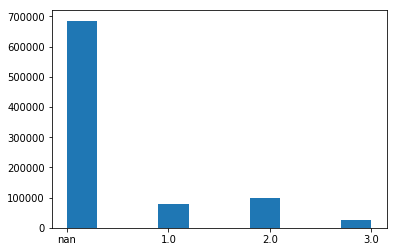

ALTERSKATEGORIE_GROB


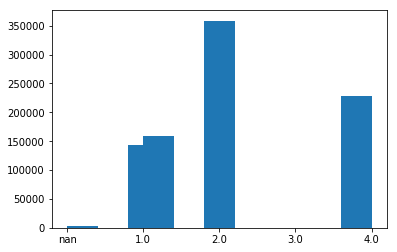

ANREDE_KZ


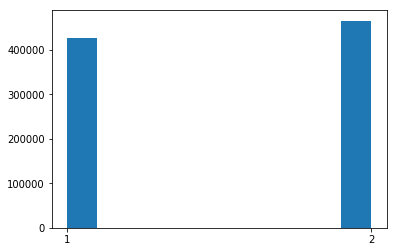

CJT_GESAMTTYP


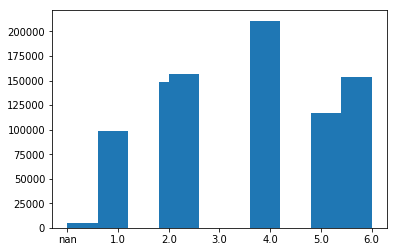

FINANZ_MINIMALIST


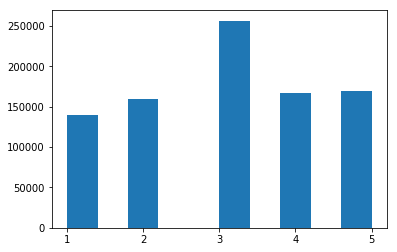

FINANZ_SPARER


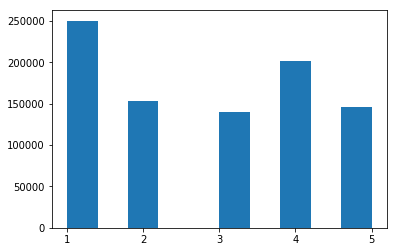

FINANZ_VORSORGER


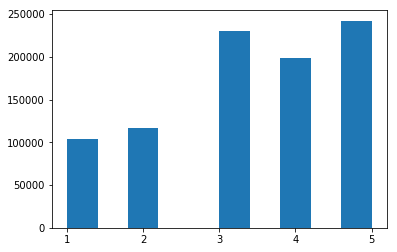

FINANZ_ANLEGER


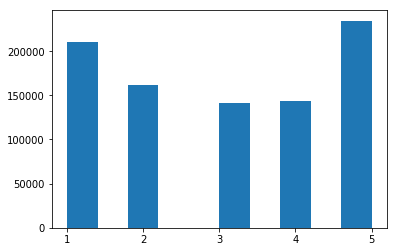

FINANZ_UNAUFFAELLIGER


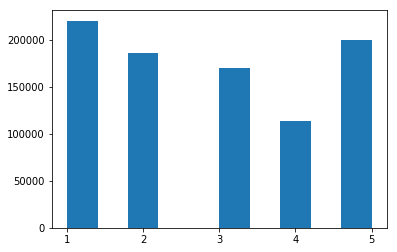

FINANZ_HAUSBAUER


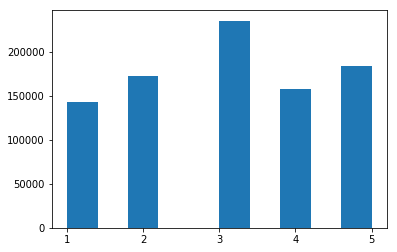

FINANZTYP


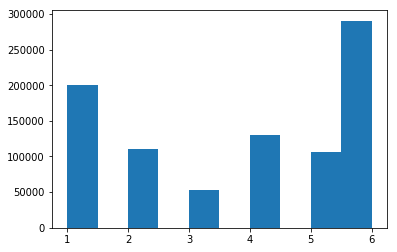

GEBURTSJAHR


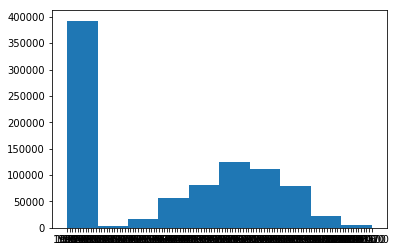

GFK_URLAUBERTYP


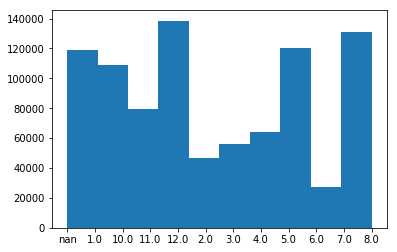

GREEN_AVANTGARDE


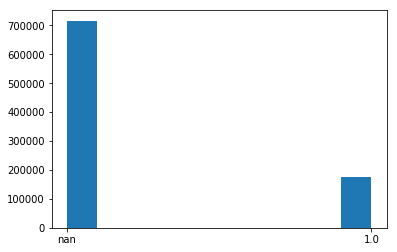

HEALTH_TYP


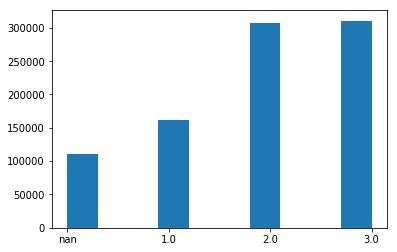

LP_LEBENSPHASE_FEIN


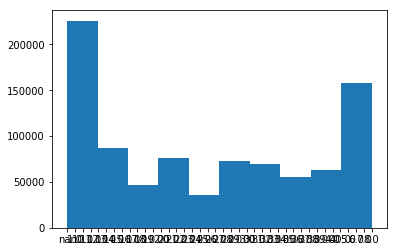

LP_LEBENSPHASE_GROB


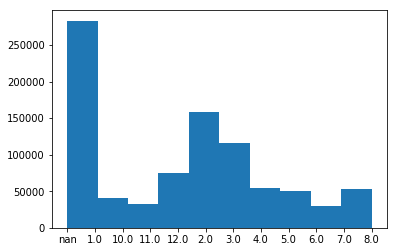

LP_FAMILIE_FEIN


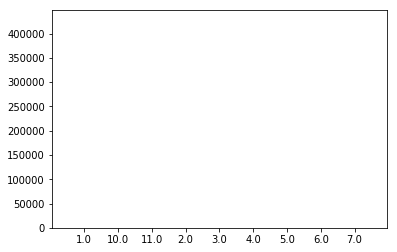

LP_FAMILIE_GROB


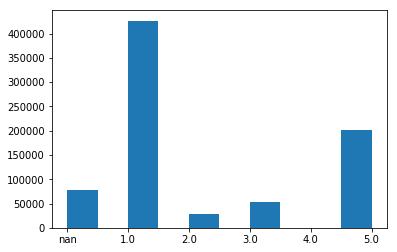

LP_STATUS_FEIN


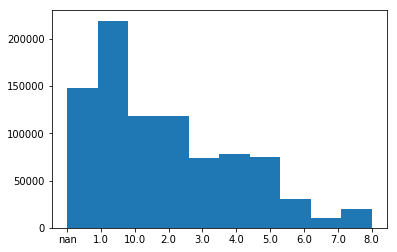

LP_STATUS_GROB


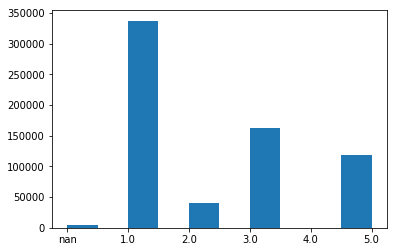

NATIONALITAET_KZ


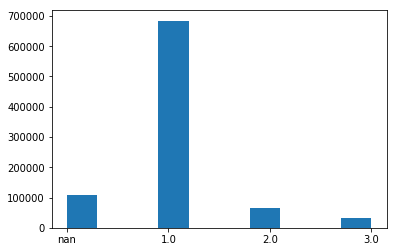

PRAEGENDE_JUGENDJAHRE


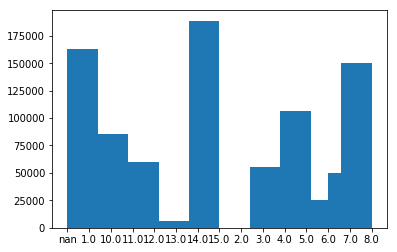

RETOURTYP_BK_S


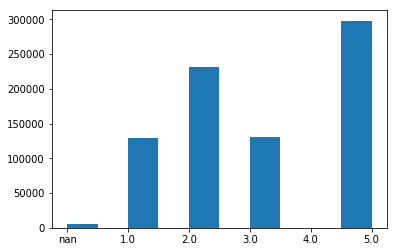

SEMIO_SOZ


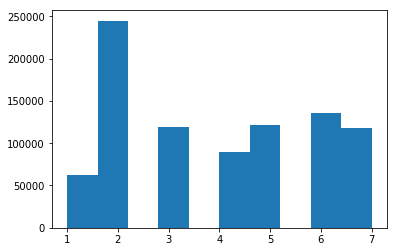

SEMIO_FAM


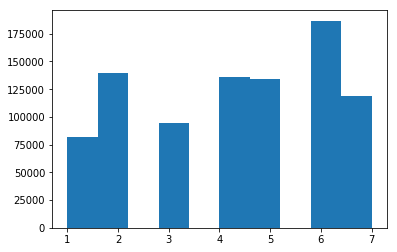

SEMIO_REL


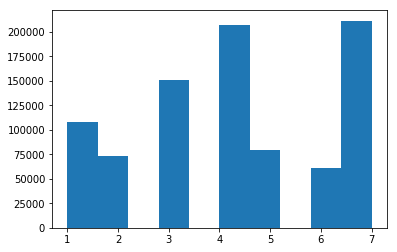

SEMIO_MAT


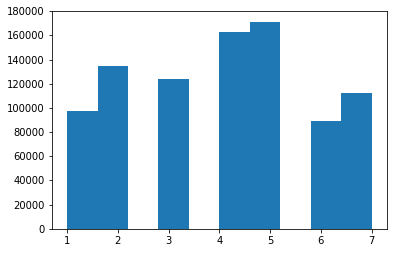

SEMIO_VERT


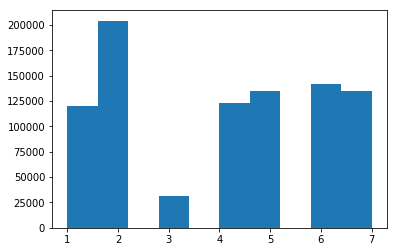

SEMIO_LUST


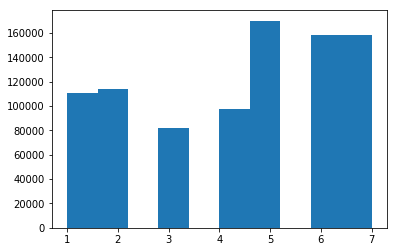

SEMIO_ERL


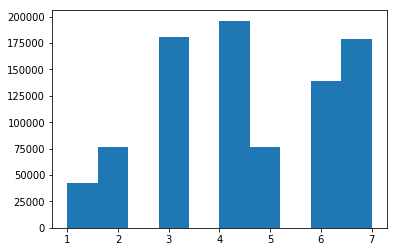

SEMIO_KULT


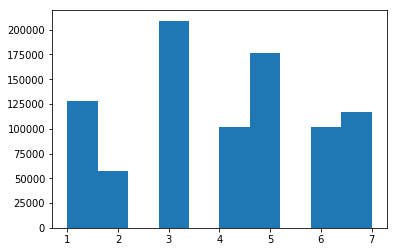

SEMIO_RAT


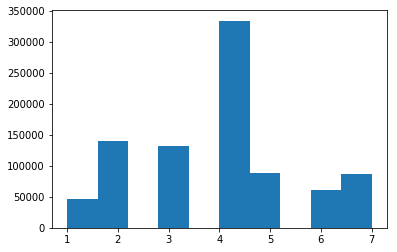

SEMIO_KRIT


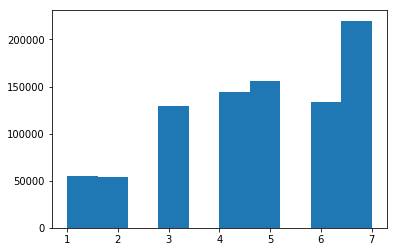

SEMIO_DOM


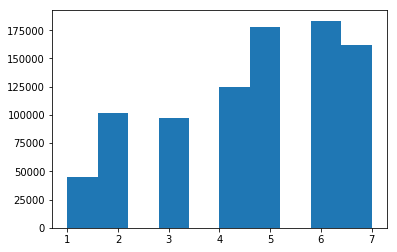

SEMIO_KAEM


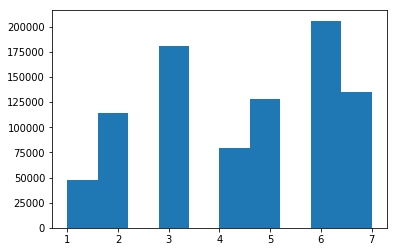

SEMIO_PFLICHT


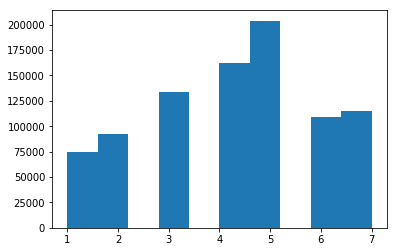

SEMIO_TRADV


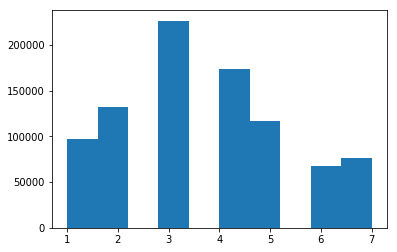

SHOPPER_TYP


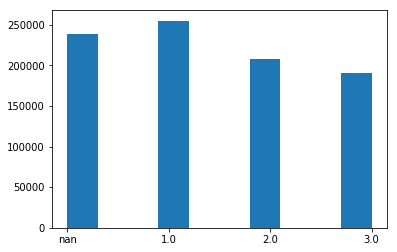

SOHO_KZ


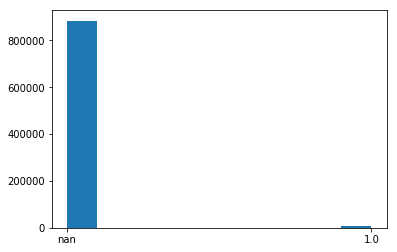

TITEL_KZ


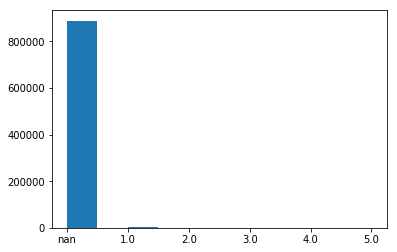

VERS_TYP


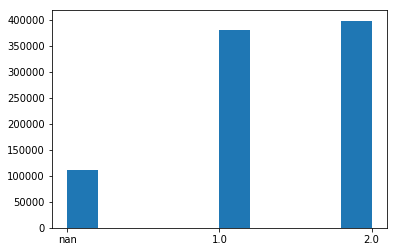

ZABEOTYP


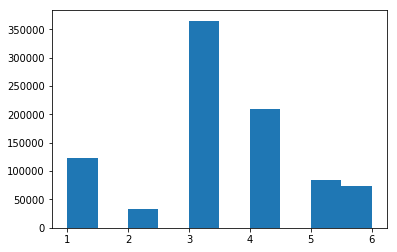

ALTER_HH


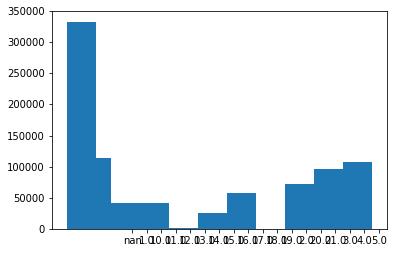

ANZ_PERSONEN


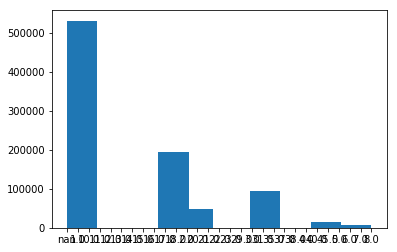

ANZ_TITEL


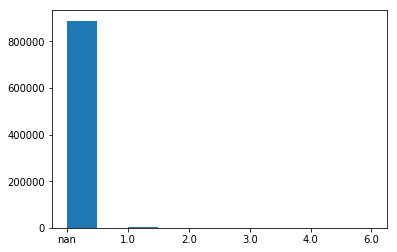

HH_EINKOMMEN_SCORE


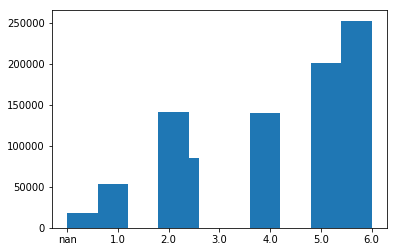

KK_KUNDENTYP


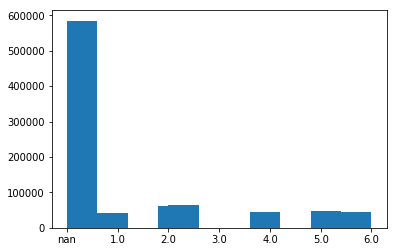

W_KEIT_KIND_HH


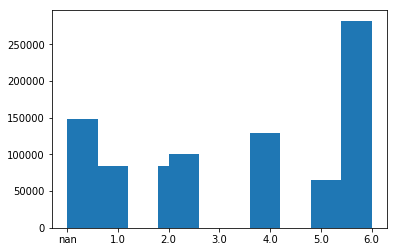

WOHNDAUER_2008


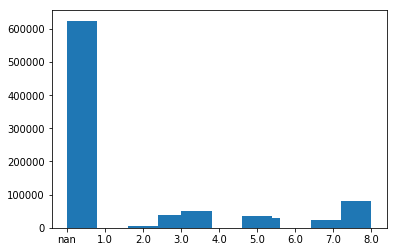

ANZ_HAUSHALTE_AKTIV


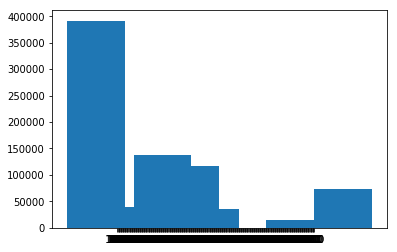

ANZ_HH_TITEL


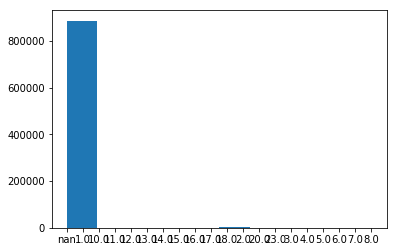

GEBAEUDETYP


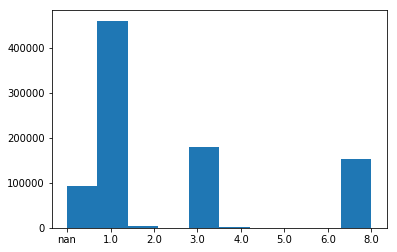

KONSUMNAEHE


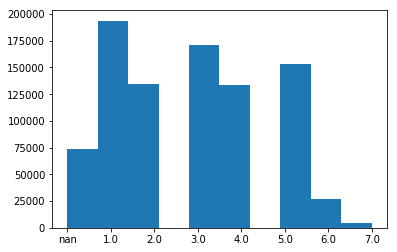

MIN_GEBAEUDEJAHR


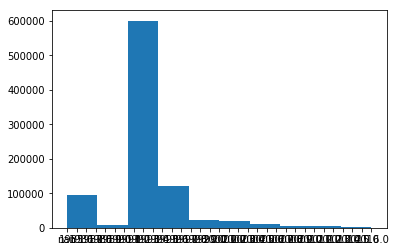

OST_WEST_KZ


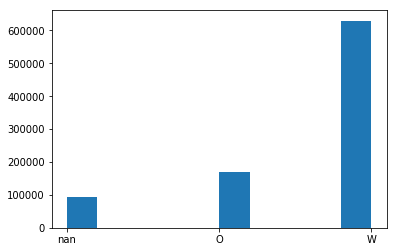

WOHNLAGE


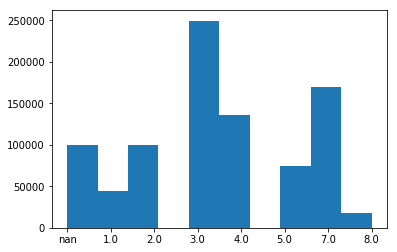

CAMEO_DEUG_2015


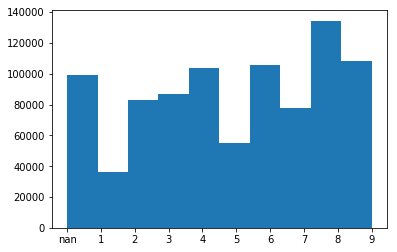

CAMEO_DEU_2015


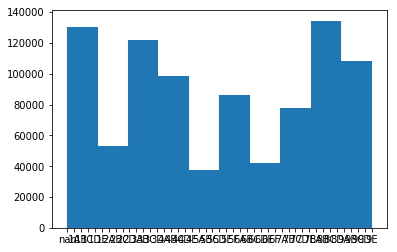

CAMEO_INTL_2015


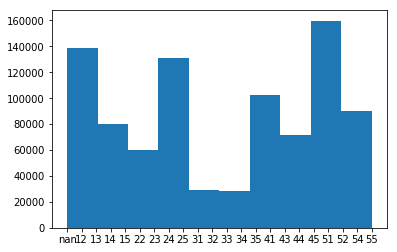

KBA05_ANTG1


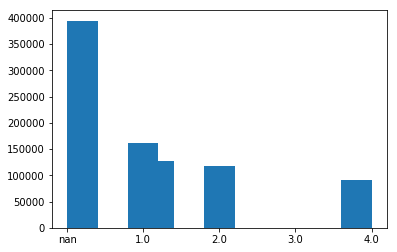

KBA05_ANTG2


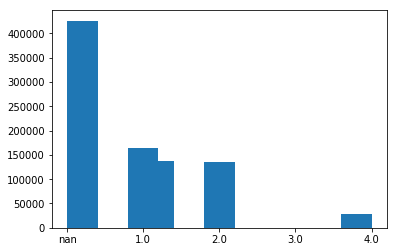

KBA05_ANTG3


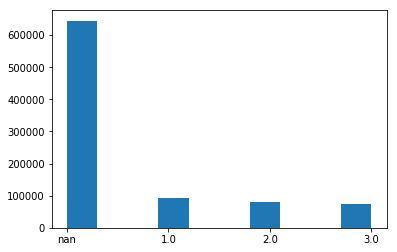

KBA05_ANTG4


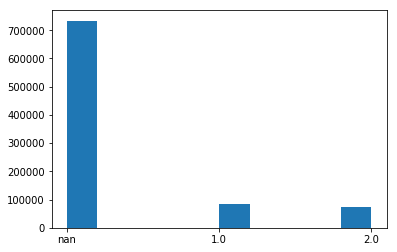

KBA05_BAUMAX


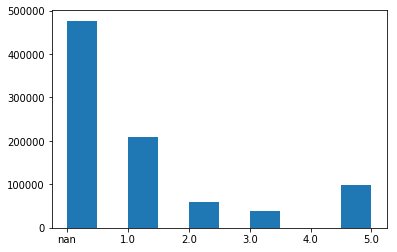

KBA05_GBZ


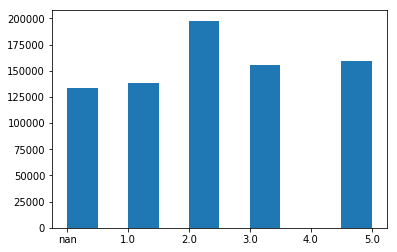

BALLRAUM


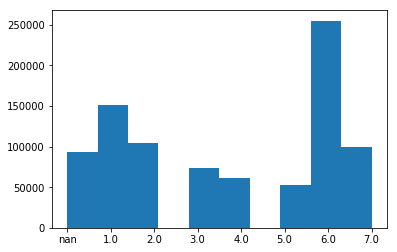

EWDICHTE


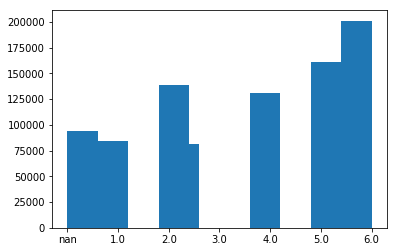

INNENSTADT


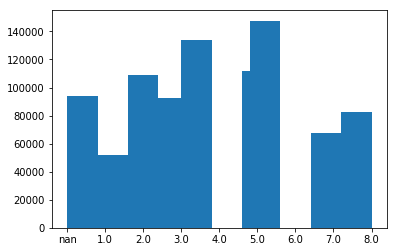

GEBAEUDETYP_RASTER


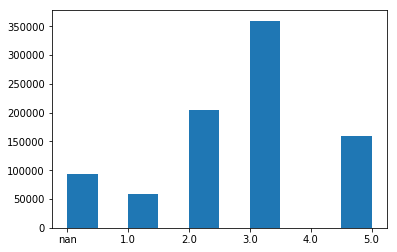

KKK


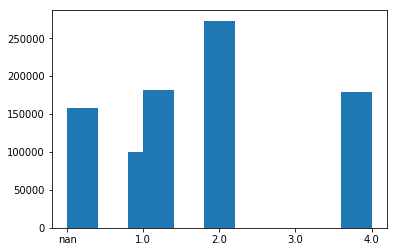

MOBI_REGIO


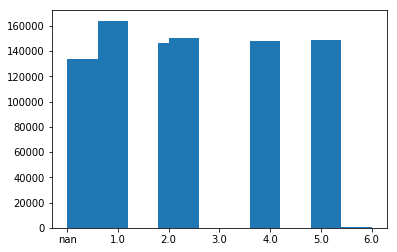

ONLINE_AFFINITAET


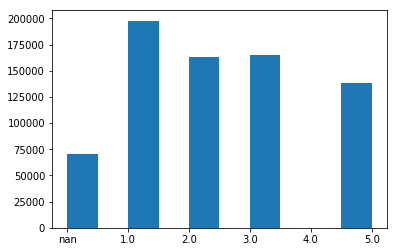

REGIOTYP


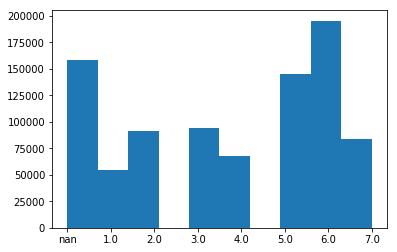

KBA13_ANZAHL_PKW


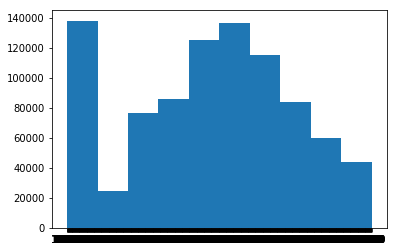

PLZ8_ANTG1


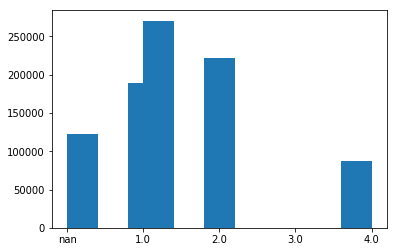

PLZ8_ANTG2


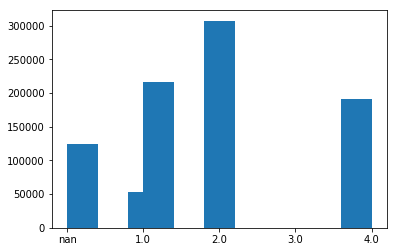

PLZ8_ANTG3


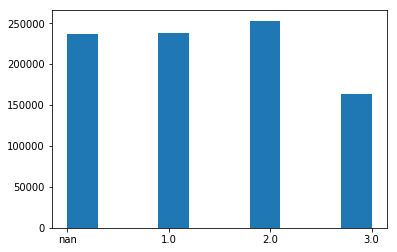

PLZ8_ANTG4


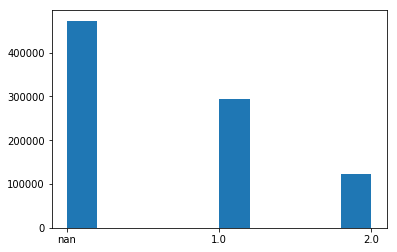

PLZ8_BAUMAX


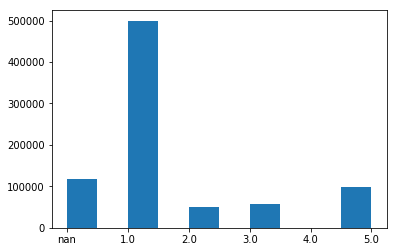

PLZ8_HHZ


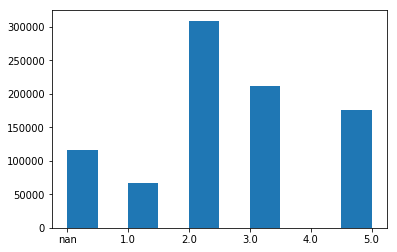

PLZ8_GBZ


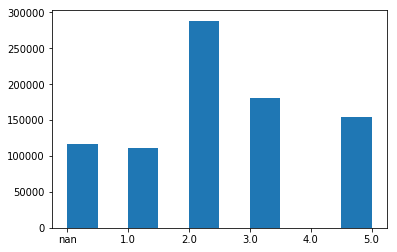

ARBEIT


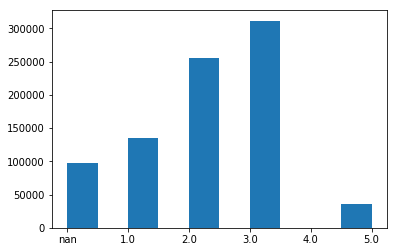

ORTSGR_KLS9


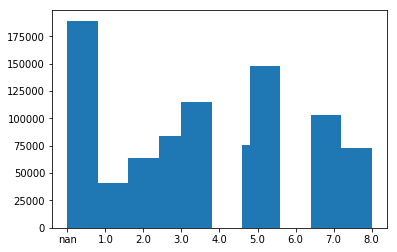

RELAT_AB


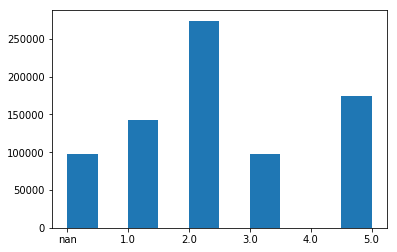

DONE


In [15]:
# I changed the NaN values to -10 temporarily to plot it next to the rest of the data, only to see the proportion
for column in feat_info['attribute']:
    print(column)
    # .astype(str) to be able to draw np.NaN and numeric,string values together
    plt.hist(azdias[column].astype(str))
    plt.show()
print("DONE")

In [16]:
# Investigate patterns in the amount of missing data in each column.

# Few cells ago, I saved NaN values in a dictionary, these are the 5 columns with most NaN values
most_NaN = dict(sorted(dic_attr_NaN.items(), key=lambda item: item[1], reverse=True)[:5])
most_NaN


{'TITEL_KZ': 889061,
 'ANZ_TITEL': 888041,
 'SOHO_KZ': 884333,
 'ANZ_HH_TITEL': 867286,
 'KBA05_ANTG4': 733495}

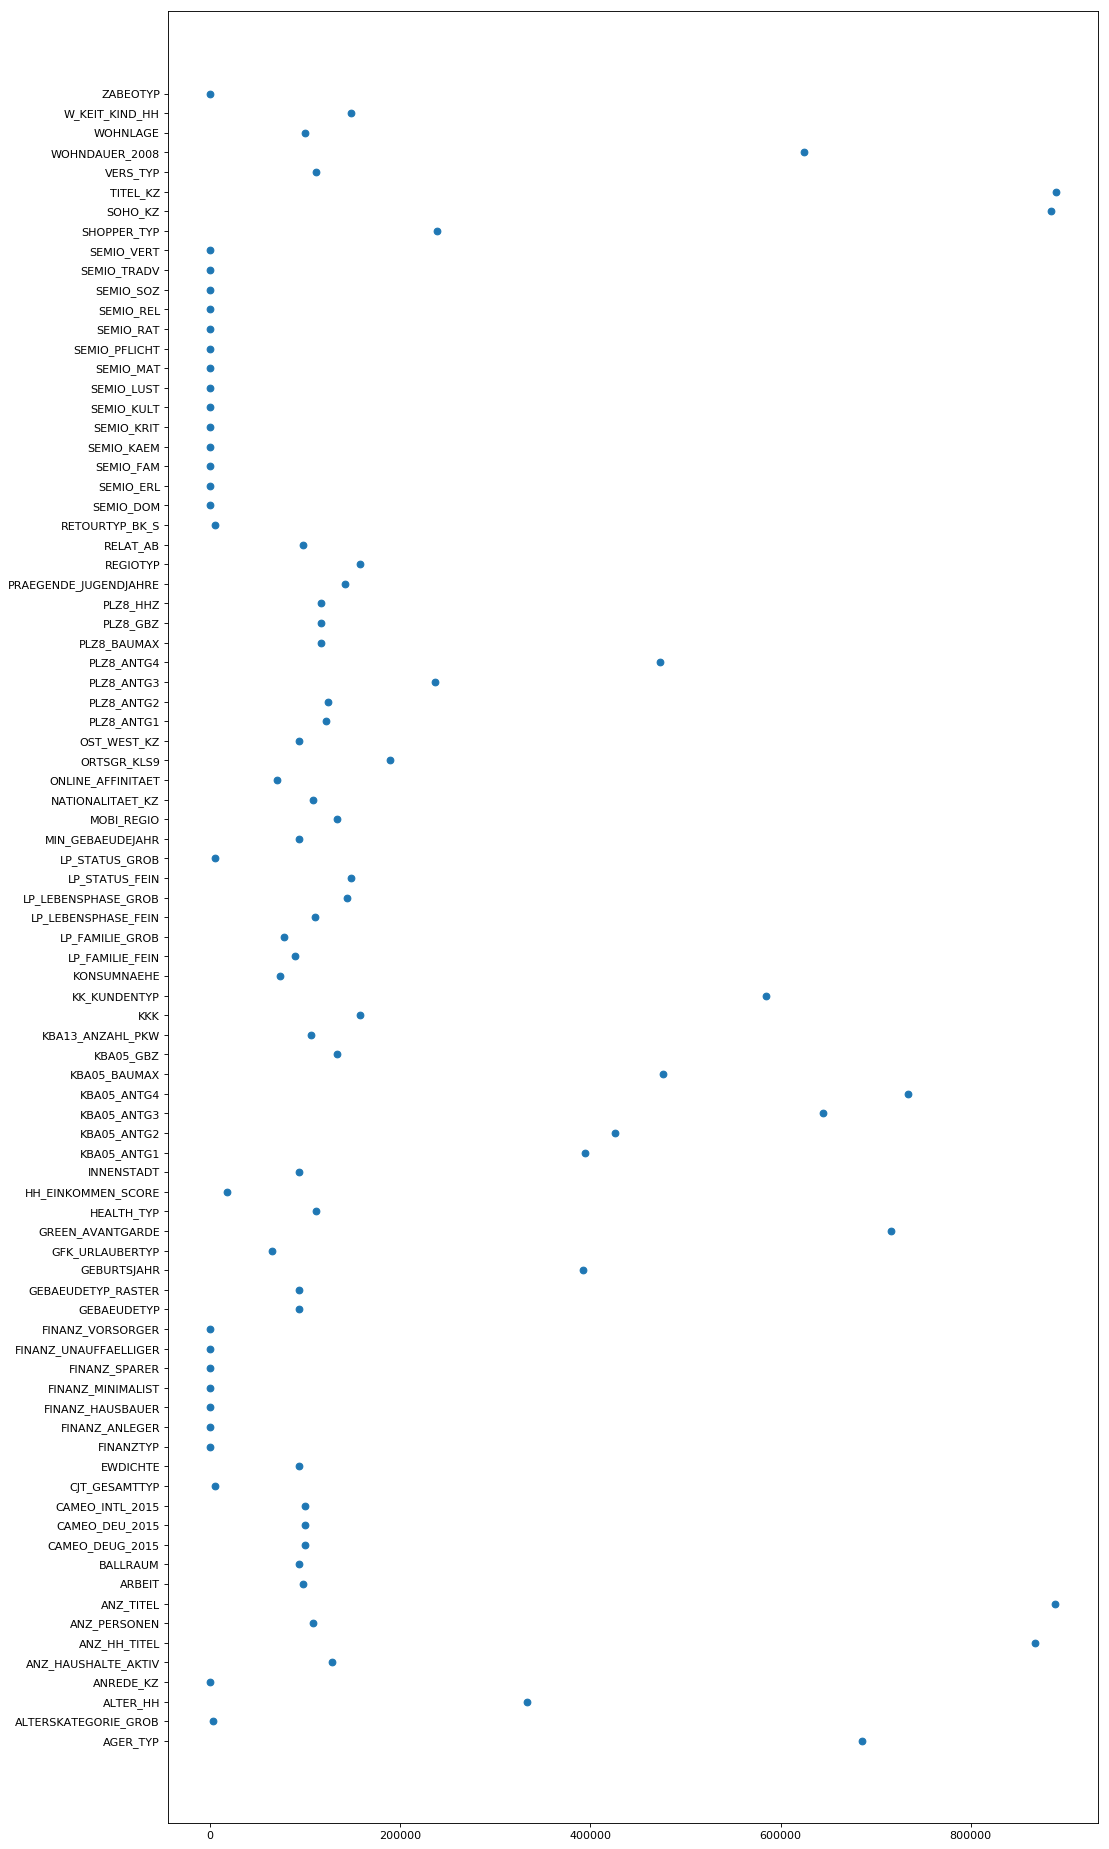

In [17]:
from matplotlib.pyplot import figure

figure(figsize=(15, 30), dpi=80)
# Below is a graph to show each column and the amount of NaN values it has, we can clearly see TITEL_KZ, ANZ_TITEL,
# SOHO_KZ and ANZ_HH_TITEL having way more NaN values compared to others, I deleted the highest 5 columns with KBA05_ANTG4
plt.scatter(dic_attr_NaN.values(), dic_attr_NaN.keys())

In [18]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

old_azdias = azdias
for i in most_NaN.keys():
    azdias = azdias.drop([i], axis=1)


In [19]:
# Now the columns are gone in azdias_reduced
print(len(old_azdias.columns.values))
print(len(azdias.columns.values))

85
80


#### Discussion 1.1.2: Assess Missing Data in Each Column

(Double click this cell and replace this text with your own text, reporting your observations regarding the amount of missing data in each column. Are there any patterns in missing values? Which columns were removed from the dataset?)

###### Answer:
I notice there's a lot of missing data. TITEL_KZ, ANZ_TITEL, SOHO_KZ and ANZ_HH_TITEL have so many NaN values do I dropped them

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [20]:
# Old tries, not important

# nan_values = azdias_reduced[azdias_reduced.isna().any(axis=1)]
# nan_values
# NaN_appeared = {}
# NaN_missing = {}

# azdias_reduced=azdias    

# temp = azdias.applymap(lambda x: str(x) == "nan")

# temp
# print("START")
# for i in azdias.index:
#     appeared = False
#     for j in azdias:
#         if str(azdias[j][i]) == "nan":
#             NaN_appeared.append(azdias.loc[:i])
#             appeared = True
#     if not appeared:
#         NaN_missing.append(azdias.loc[:i])
#     if i%10000 == 0:
#         print(i)
# print("END")

# def col_iter(y):
#     if str(azdias[y]) == "nan":
#         return True
#     else:
#         return False

# def row_iter(x):
#     appeared = False
#     for j in azdias:
#         if str(azdias[j][x]) == "nan":
#             NaN_appeared[x] = azdias.loc[:x]
#             appeared = True
#         if not appeared:
#             NaN_missing[x] = azdias.loc[:x]
#     if x%100 == 0:
#         print(x)   
#     print("END")
#     appeared = False
#     col_vec = np.vectorize(row_iter)
#     col_vec(azdias.iloc[:x])
# row_vec = np.vectorize(row_iter)
# row_vec(azdias.index)


In [21]:
# How much data is missing in each row of the dataset?


NaN_appeared = azdias[azdias.isna().any(axis=1)]

NaN_missing = azdias[azdias.isna().any(axis=1) == False]

# Here's rows with NaN values
NaN_appeared

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0            NaN                   2.0          1            2.0   
1            NaN                   1.0          2            5.0   
2            NaN                   3.0          2            3.0   
3            2.0                   4.0          2            2.0   
4            NaN                   3.0          1            5.0   
5            3.0                   1.0          2            2.0   
6            NaN                   2.0          2            5.0   
7            NaN                   1.0          1            3.0   
8            NaN                   3.0          1            3.0   
9            NaN                   3.0          2            4.0   
10           NaN                   3.0          2            1.0   
11           NaN                   2.0          1            6.0   
12           NaN                   3.0          1            6.0   
13           NaN                   1.0          2            5.0   
14           NaN                   3.0          1            6.0   
15           1.0                   4.0          2            4.0   
16           NaN                   1.0          2            1.0   
17           NaN                   2.0          1            6.0   
18           NaN                   2.0          2            6.0   
19           NaN                   3.0          1            3.0   
20           NaN                   2.0          2            4.0   
21           NaN                   2.0          1            3.0   
22           NaN                   1.0          1            4.0   
23           NaN                   3.0          1            3.0   
24           NaN                   3.0          2            6.0   
25           NaN                   1.0          1            3.0   
26           NaN                   3.0          1            3.0   
27           NaN                   3.0          1            4.0   
28           NaN                   3.0          1            2.0   
29           2.0                   4.0          2            1.0   
...          ...                   ...        ...            ...   
891191       1.0                   4.0          2            1.0   
891192       NaN                   1.0          2            3.0   
891193       2.0                   4.0          1            3.0   
891194       NaN                   3.0          1            4.0   
891195       2.0                   4.0          2            6.0   
891196       NaN                   2.0          2            6.0   
891197       NaN                   3.0          2            1.0   
891198       NaN                   3.0          1            5.0   
891199       NaN                   2.0          1            3.0   
891200       NaN                   1.0          2            3.0   
891201       NaN                   3.0          1            3.0   
891202       NaN                   2.0          2            5.0   
891203       NaN                   4.0          2            1.0   
891204       NaN                   3.0          1            5.0   
891205       1.0                   4.0          1            2.0   
891206       NaN                   1.0          2            4.0   
891207       1.0                   3.0          2            1.0   
891208       NaN                   4.0          1            2.0   
891209       NaN                   1.0          2            5.0   
891210       NaN                   3.0          1            5.0   
891211       NaN                   3.0          1            2.0   
891212       NaN                   4.0          1            1.0   
891213       NaN                   4.0          2            5.0   
891214       NaN                   1.0          2            4.0   
891215       NaN                   2.0          2            6.0   
891216       NaN                   3.0          2            5.0   
891217       NaN                   2.0          1            4.0

In [22]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.


# Now that I have data with NaN values, I have total of 85 columns, I'd consider 20 NaN values in a row to be
# too much, so I'd remove them, thresh value should be 85 - 20
NaN_appeared = NaN_appeared.dropna(thresh=85-20)

NaN_appeared

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
1            NaN                   1.0          2            5.0   
2            NaN                   3.0          2            3.0   
3            2.0                   4.0          2            2.0   
4            NaN                   3.0          1            5.0   
5            3.0                   1.0          2            2.0   
6            NaN                   2.0          2            5.0   
7            NaN                   1.0          1            3.0   
8            NaN                   3.0          1            3.0   
9            NaN                   3.0          2            4.0   
10           NaN                   3.0          2            1.0   
12           NaN                   3.0          1            6.0   
13           NaN                   1.0          2            5.0   
15           1.0                   4.0          2            4.0   
16           NaN                   1.0          2            1.0   
18           NaN                   2.0          2            6.0   
19           NaN                   3.0          1            3.0   
21           NaN                   2.0          1            3.0   
22           NaN                   1.0          1            4.0   
23           NaN                   3.0          1            3.0   
25           NaN                   1.0          1            3.0   
27           NaN                   3.0          1            4.0   
28           NaN                   3.0          1            2.0   
29           2.0                   4.0          2            1.0   
31           NaN                   2.0          2            6.0   
32           NaN                   1.0          1            4.0   
33           NaN                   2.0          2            4.0   
34           3.0                   1.0          2            2.0   
36           NaN                   3.0          2            2.0   
37           2.0                   4.0          1            2.0   
38           NaN                   2.0          2            6.0   
...          ...                   ...        ...            ...   
891190       2.0                   3.0          1            1.0   
891191       1.0                   4.0          2            1.0   
891192       NaN                   1.0          2            3.0   
891193       2.0                   4.0          1            3.0   
891194       NaN                   3.0          1            4.0   
891195       2.0                   4.0          2            6.0   
891196       NaN                   2.0          2            6.0   
891197       NaN                   3.0          2            1.0   
891198       NaN                   3.0          1            5.0   
891199       NaN                   2.0          1            3.0   
891200       NaN                   1.0          2            3.0   
891201       NaN                   3.0          1            3.0   
891202       NaN                   2.0          2            5.0   
891204       NaN                   3.0          1            5.0   
891205       1.0                   4.0          1            2.0   
891206       NaN                   1.0          2            4.0   
891207       1.0                   3.0          2            1.0   
891208       NaN                   4.0          1            2.0   
891209       NaN                   1.0          2            5.0   
891210       NaN                   3.0          1            5.0   
891211       NaN                   3.0          1            2.0   
891212       NaN                   4.0          1            1.0   
891213       NaN                   4.0          2            5.0   
891214       NaN                   1.0          2            4.0   
891215       NaN                   2.0          2            6.0   
891216       NaN                   3.0          2            5.0   
891217       NaN                   2.0          1            4.0

(array([  90527.,   38081.,   59951.,   79310.,       0.,  109523.,
         141765.,   73170.,   98762.,   70237.]),
 array([-1. , -0.2,  0.6,  1.4,  2.2,  3. ,  3.8,  4.6,  5.4,  6.2,  7. ]),
 <a list of 10 Patch objects>)

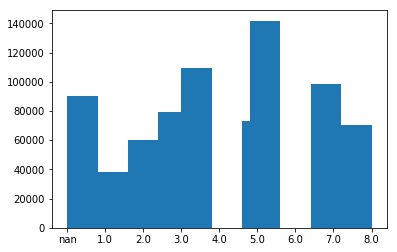

In [23]:
#Here's a column example, NaN values are reduced significantly
plt.hist(NaN_appeared["ORTSGR_KLS9"].astype(str))

In [24]:
# And here, data that has no NaN values, completely clean data
NaN_missing

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
115657       2.0                   4.0          2            2.0   
195502       2.0                   4.0          2            3.0   
245526       1.0                   3.0          2            2.0   
248995       2.0                   4.0          1            6.0   
433718       2.0                   4.0          2            2.0   
442508       1.0                   3.0          2            5.0   
529309       2.0                   3.0          2            4.0   
663051       2.0                   3.0          1            4.0   

        FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
115657                  3              1                 5               1   
195502                  2              1                 5               1   
245526                  2              1                 5               1   
248995                  4              1                 4               1   
433718                  4              1                 4               1   
442508                  3              1                 5               1   
529309                  3              1                 5               1   
663051                  4              1                 5               1   

        FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER    ...     PLZ8_ANTG1  \
115657                      2                 5    ...            1.0   
195502                      1                 5    ...            1.0   
245526                      2                 4    ...            2.0   
248995                      1                 5    ...            1.0   
433718                      1                 5    ...            1.0   
442508                      2                 5    ...            2.0   
529309                      1                 5    ...            2.0   
663051                      5                 5    ...            1.0   

        PLZ8_ANTG2  PLZ8_ANTG3  PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  \
115657         4.0         2.0         1.0          5.0       4.0       3.0   
195502         4.0         3.0         2.0          5.0       5.0       3.0   
245526         2.0         1.0         1.0          1.0       4.0       5.0   
248995         4.0         3.0         1.0          5.0       4.0       3.0   
433718         4.0         2.0         2.0          5.0       5.0       3.0   
442508         3.0         2.0         1.0          1.0       3.0       3.0   
529309         4.0         2.0         1.0          5.0       2.0       2.0   
663051         3.0         3.0         2.0          5.0       5.0       2.0   

        ARBEIT  ORTSGR_KLS9  RELAT_AB  
115657     2.0          5.0       3.0  
195502     3.0          7.0       5.0  
245526     4.0          7.0       5.0  
248995     3.0          7.0       2.0  
433718     4.0          8.0       3.0  
442508     2.0          6.0       2.0  
529309     3.0          7.0       5.0  
663051     4.0          8.0       5.0  

[8 rows x 80 columns]

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  4.,  0.,  0.,  2.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

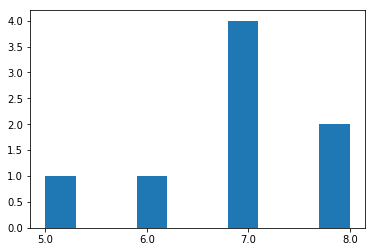

In [25]:
# Same column in the Nan_missing frame, 0 NaN
plt.hist(NaN_missing["ORTSGR_KLS9"].astype(str))

In [26]:
print(f"After cleaning data, NaN appeared at least once in {len(NaN_appeared)} rows, and didn't appear at all in {len(NaN_missing)} rows \
that's total of {len(NaN_appeared) + len(NaN_missing)} rows")

After cleaning data, NaN appeared at least once in 761326 rows, and didn't appear at all in 8 rows that's total of 761334 rows


5 columns in the NaN_missing DataFrame

AGER_TYP


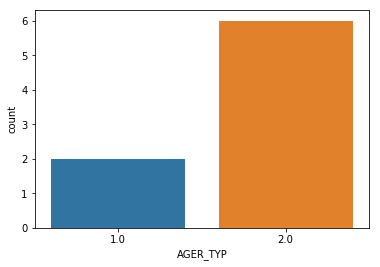

FINANZ_HAUSBAUER


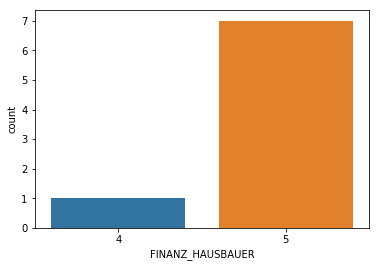

PLZ8_ANTG3


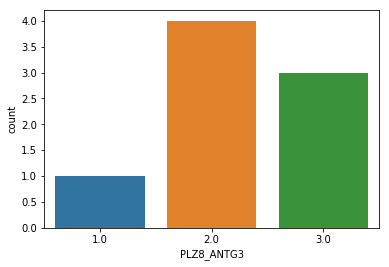

PLZ8_GBZ


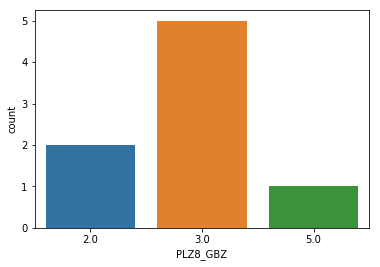

RELAT_AB


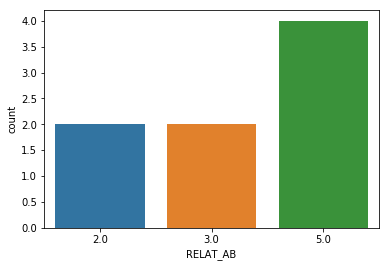

5 columns in the NaN_appeared DataFrame

AGER_TYP


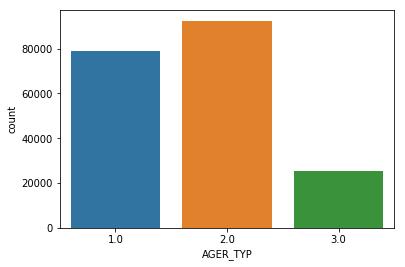

FINANZ_HAUSBAUER


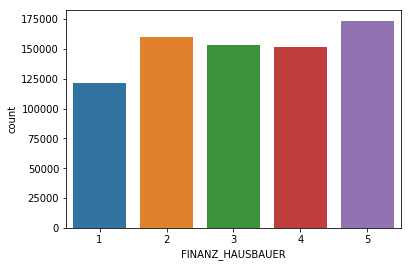

PLZ8_ANTG3


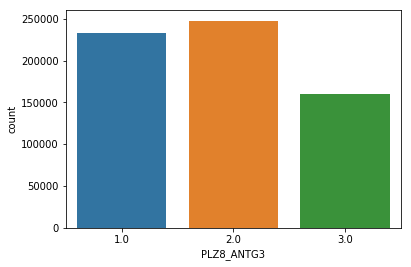

PLZ8_GBZ


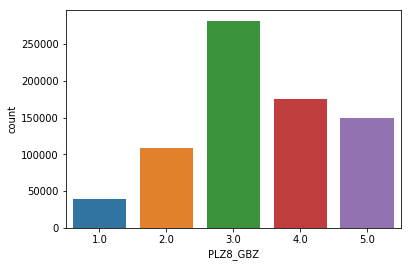

RELAT_AB


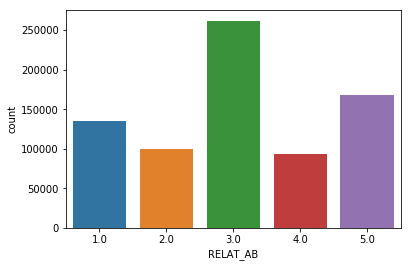

In [27]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

data = [NaN_missing, NaN_appeared]
NaN_missing.name = "NaN_missing"
NaN_appeared.name = "NaN_appeared"


for d in data:
    print(f"5 columns in the {d.name} DataFrame\n")
    print("AGER_TYP")
    sns.countplot(data = d, x = "AGER_TYP")
    plt.show()
    print("FINANZ_HAUSBAUER")
    sns.countplot(data = d, x = "FINANZ_HAUSBAUER")
    plt.show()
    print("PLZ8_ANTG3")
    sns.countplot(data = d, x = "PLZ8_ANTG3")
    plt.show()
    print("PLZ8_GBZ")
    sns.countplot(data = d, x = "PLZ8_GBZ")
    plt.show()
    print("RELAT_AB")
    sns.countplot(data = d, x = "RELAT_AB")
    plt.show()

In [28]:
frames = [NaN_appeared, NaN_missing]
new_azdias = pd.concat(frames)
new_azdias

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
1            NaN                   1.0          2            5.0   
2            NaN                   3.0          2            3.0   
3            2.0                   4.0          2            2.0   
4            NaN                   3.0          1            5.0   
5            3.0                   1.0          2            2.0   
6            NaN                   2.0          2            5.0   
7            NaN                   1.0          1            3.0   
8            NaN                   3.0          1            3.0   
9            NaN                   3.0          2            4.0   
10           NaN                   3.0          2            1.0   
12           NaN                   3.0          1            6.0   
13           NaN                   1.0          2            5.0   
15           1.0                   4.0          2            4.0   
16           NaN                   1.0          2            1.0   
18           NaN                   2.0          2            6.0   
19           NaN                   3.0          1            3.0   
21           NaN                   2.0          1            3.0   
22           NaN                   1.0          1            4.0   
23           NaN                   3.0          1            3.0   
25           NaN                   1.0          1            3.0   
27           NaN                   3.0          1            4.0   
28           NaN                   3.0          1            2.0   
29           2.0                   4.0          2            1.0   
31           NaN                   2.0          2            6.0   
32           NaN                   1.0          1            4.0   
33           NaN                   2.0          2            4.0   
34           3.0                   1.0          2            2.0   
36           NaN                   3.0          2            2.0   
37           2.0                   4.0          1            2.0   
38           NaN                   2.0          2            6.0   
...          ...                   ...        ...            ...   
891198       NaN                   3.0          1            5.0   
891199       NaN                   2.0          1            3.0   
891200       NaN                   1.0          2            3.0   
891201       NaN                   3.0          1            3.0   
891202       NaN                   2.0          2            5.0   
891204       NaN                   3.0          1            5.0   
891205       1.0                   4.0          1            2.0   
891206       NaN                   1.0          2            4.0   
891207       1.0                   3.0          2            1.0   
891208       NaN                   4.0          1            2.0   
891209       NaN                   1.0          2            5.0   
891210       NaN                   3.0          1            5.0   
891211       NaN                   3.0          1            2.0   
891212       NaN                   4.0          1            1.0   
891213       NaN                   4.0          2            5.0   
891214       NaN                   1.0          2            4.0   
891215       NaN                   2.0          2            6.0   
891216       NaN                   3.0          2            5.0   
891217       NaN                   2.0          1            4.0   
891218       NaN                   2.0          2            4.0   
891219       NaN                   1.0          1            3.0   
891220       NaN                   4.0          1            1.0   
115657       2.0                   4.0          2            2.0   
195502       2.0                   4.0          2            3.0   
245526       1.0                   3.0          2            2.0   
248995       2.0                   4.0          1            6.0   
433718       2.0                   4.0          2            2.0

#### Discussion 1.1.3: Assess Missing Data in Each Row

(Double-click this cell and replace this text with your own text, reporting your observations regarding missing data in rows. Are the data with lots of missing values are qualitatively different from data with few or no missing values?)

###### ANSWER
Rows with a lot of missing values are significant, and needs to be dealt with accordingly

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [29]:
# How many features are there of each data type?

data_type = feat_info["type"].value_counts()
data_type

ordinal        49
categorical    21
mixed           7
numeric         7
interval        1
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [30]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

# Dropped columns that were already dropped before
categorical_columns = (feat_info.loc[feat_info['type'] == "categorical"]["attribute"]).drop([39,40])
categorical_columns

0             AGER_TYP
2            ANREDE_KZ
3        CJT_GESAMTTYP
10           FINANZTYP
12     GFK_URLAUBERTYP
13    GREEN_AVANTGARDE
17     LP_FAMILIE_FEIN
18     LP_FAMILIE_GROB
19      LP_STATUS_FEIN
20      LP_STATUS_GROB
21    NATIONALITAET_KZ
38         SHOPPER_TYP
41            VERS_TYP
42            ZABEOTYP
47        KK_KUNDENTYP
52         GEBAEUDETYP
55         OST_WEST_KZ
57     CAMEO_DEUG_2015
58      CAMEO_DEU_2015
Name: attribute, dtype: object

In [31]:
# These are the categorical columns
azdias[categorical_columns]

AGER_TYP  ANREDE_KZ  CJT_GESAMTTYP  FINANZTYP  GFK_URLAUBERTYP  \
0            NaN          1            2.0          4             10.0   
1            NaN          2            5.0          1             10.0   
2            NaN          2            3.0          1             10.0   
3            2.0          2            2.0          6              1.0   
4            NaN          1            5.0          5              5.0   
5            3.0          2            2.0          2              1.0   
6            NaN          2            5.0          4             12.0   
7            NaN          1            3.0          5              NaN   
8            NaN          1            3.0          6              3.0   
9            NaN          2            4.0          1             12.0   
10           NaN          2            1.0          6              8.0   
11           NaN          1            6.0          4              5.0   
12           NaN          1            6.0          3             10.0   
13           NaN          2            5.0          1             12.0   
14           NaN          1            6.0          4              5.0   
15           1.0          2            4.0          2             12.0   
16           NaN          2            1.0          3             10.0   
17           NaN          1            6.0          4              5.0   
18           NaN          2            6.0          1             11.0   
19           NaN          1            3.0          5              8.0   
20           NaN          2            4.0          3             11.0   
21           NaN          1            3.0          3             11.0   
22           NaN          1            4.0          1              4.0   
23           NaN          1            3.0          6             12.0   
24           NaN          2            6.0          4              5.0   
25           NaN          1            3.0          4              1.0   
26           NaN          1            3.0          3              2.0   
27           NaN          1            4.0          5              8.0   
28           NaN          1            2.0          3              1.0   
29           2.0          2            1.0          6              5.0   
...          ...        ...            ...        ...              ...   
891191       1.0          2            1.0          2              6.0   
891192       NaN          2            3.0          1             10.0   
891193       2.0          1            3.0          5              4.0   
891194       NaN          1            4.0          3              NaN   
891195       2.0          2            6.0          2              5.0   
891196       NaN          2            6.0          1             12.0   
891197       NaN          2            1.0          5              5.0   
891198       NaN          1            5.0          1             10.0   
891199       NaN          1            3.0          1             11.0   
891200       NaN          2            3.0          1             12.0   
891201       NaN          1            3.0          6              7.0   
891202       NaN          2            5.0          1             10.0   
891203       NaN          2            1.0          5              8.0   
891204       NaN          1            5.0          6             11.0   
891205       1.0          1            2.0          2              5.0   
891206       NaN          2            4.0          4             12.0   
891207       1.0          2            1.0          2              8.0   
891208       NaN          1            2.0          6             10.0   
891209       NaN          2            5.0          1              NaN   
891210       NaN          1            5.0          6              4.0   
891211       NaN          1            2.0          2              1.0   
891212       NaN          1            1.0          5              4.0   
891213      

In [32]:
# I will check each column to see if it's binary, or if there's a value needs to be encoded, or multi level

for i in categorical_columns:
    print(f"Number of unique values in column {i} is\n {new_azdias[i].value_counts()}\n\n")

Number of unique values in column AGER_TYP is
 2.0    92443
1.0    78890
3.0    25507
Name: AGER_TYP, dtype: int64


Number of unique values in column ANREDE_KZ is
 2    395082
1    366252
Name: ANREDE_KZ, dtype: int64


Number of unique values in column CJT_GESAMTTYP is
 4.0    191874
3.0    142723
2.0    137121
5.0    101996
6.0     96415
1.0     89682
Name: CJT_GESAMTTYP, dtype: int64


Number of unique values in column FINANZTYP is
 6    283231
1    181847
5    103350
2    100415
4     53999
3     38492
Name: FINANZTYP, dtype: int64


Number of unique values in column GFK_URLAUBERTYP is
 12.0    121991
10.0     99115
8.0      80775
11.0     72793
5.0      68841
4.0      58994
3.0      51280
1.0      49091
2.0      39260
7.0      39095
6.0      24855
Name: GFK_URLAUBERTYP, dtype: int64


Number of unique values in column GREEN_AVANTGARDE is
 1.0    171528
Name: GREEN_AVANTGARDE, dtype: int64


Number of unique values in column LP_FAMILIE_FEIN is
 1.0     384754
10.0    125732
2.0   

In [33]:
#From observation, I can say ANREDE_KZ, GREEN_AVANTGARDE and SOHO_KZ are binary, I will not change anything with them.
#OST_WEST_KZ contains 2 values, W and O, I can make it a dummy variable.
#CAMEO_DEU_2015 will be dropped.

In [34]:
# Re-encode categorical variable(s) to be kept in the analysis.

new_azdias = pd.get_dummies(new_azdias, columns=["OST_WEST_KZ"])
new_azdias = new_azdias.drop(["CAMEO_DEU_2015"], axis=1)

#### Discussion 1.2.1: Re-Encode Categorical Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding categorical features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)


###### ANSWER:
I kept most of the features because most of them were numbers and will not affect my analysis negatively. However, I dropped a column called CAMEO_DEU_2015 because it's not feasable to turn it into dummy variable.
I turned OST_WEST_KZ into dummy variable, the only column I turned so far.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [35]:
mixed_columns = feat_info.loc[feat_info["type"] == "mixed"]["attribute"]
mixed_columns

15      LP_LEBENSPHASE_FEIN
16      LP_LEBENSPHASE_GROB
22    PRAEGENDE_JUGENDJAHRE
56                 WOHNLAGE
59          CAMEO_INTL_2015
64             KBA05_BAUMAX
79              PLZ8_BAUMAX
Name: attribute, dtype: object

14.0    176773
8.0     136280
10.0     82918
5.0      82290
3.0      52197
15.0     41141
11.0     34761
6.0      25450
12.0     23773
4.0      20292
1.0      19904
2.0       7427
13.0      5560
7.0       3947
Name: PRAEGENDE_JUGENDJAHRE, dtype: int64


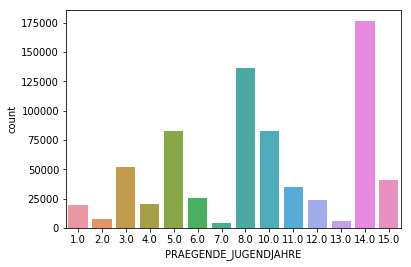

In [36]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
print(new_azdias["PRAEGENDE_JUGENDJAHRE"].value_counts())

sns.countplot(data = new_azdias, x = "PRAEGENDE_JUGENDJAHRE")
plt.show()

In [37]:
# I decided to write down the attributes in a dictionary, easier to work with
PRAEGENDE_JUGENDJAHRE_DECADE = {1:40, 2:40, 3:50,
                                   4:50, 5:60, 6:60,
                                   7:60, 8:70, 9:70,
                                   10:80, 11:80, 12:80,
                                   13:80, 14:90, 15:90}

PRAEGENDE_JUGENDJAHRE_IS_MAINSTREAM = {1:True, 2:False, 3:True, 4:False, 5:True,
                                  6:True, 7:False, 8:True, 9:False, 10:True,
                                  11:False, 12:True, 13:False, 14:True, 15:False}


print(PRAEGENDE_JUGENDJAHRE_DECADE)
print(PRAEGENDE_JUGENDJAHRE_IS_MAINSTREAM)

{1: 40, 2: 40, 3: 50, 4: 50, 5: 60, 6: 60, 7: 60, 8: 70, 9: 70, 10: 80, 11: 80, 12: 80, 13: 80, 14: 90, 15: 90}
{1: True, 2: False, 3: True, 4: False, 5: True, 6: True, 7: False, 8: True, 9: False, 10: True, 11: False, 12: True, 13: False, 14: True, 15: False}


In [38]:
# Adding the new columns, and dropping PRAEGENDE_JUGENDJAHRE

new_azdias["PRAEGENDE_JUGENDJAHRE_DECADE"] = new_azdias["PRAEGENDE_JUGENDJAHRE"].replace(PRAEGENDE_JUGENDJAHRE_DECADE)


new_azdias["PRAEGENDE_JUGENDJAHRE_IS_MAINSTREAM"] = new_azdias["PRAEGENDE_JUGENDJAHRE"].replace(PRAEGENDE_JUGENDJAHRE_IS_MAINSTREAM)


# Dropiing the PRAEGENDE_JUGENDJAHRE column
new_azdias = new_azdias.drop(["PRAEGENDE_JUGENDJAHRE"], axis=1)

new_azdias

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
1            NaN                   1.0          2            5.0   
2            NaN                   3.0          2            3.0   
3            2.0                   4.0          2            2.0   
4            NaN                   3.0          1            5.0   
5            3.0                   1.0          2            2.0   
6            NaN                   2.0          2            5.0   
7            NaN                   1.0          1            3.0   
8            NaN                   3.0          1            3.0   
9            NaN                   3.0          2            4.0   
10           NaN                   3.0          2            1.0   
12           NaN                   3.0          1            6.0   
13           NaN                   1.0          2            5.0   
15           1.0                   4.0          2            4.0   
16           NaN                   1.0          2            1.0   
18           NaN                   2.0          2            6.0   
19           NaN                   3.0          1            3.0   
21           NaN                   2.0          1            3.0   
22           NaN                   1.0          1            4.0   
23           NaN                   3.0          1            3.0   
25           NaN                   1.0          1            3.0   
27           NaN                   3.0          1            4.0   
28           NaN                   3.0          1            2.0   
29           2.0                   4.0          2            1.0   
31           NaN                   2.0          2            6.0   
32           NaN                   1.0          1            4.0   
33           NaN                   2.0          2            4.0   
34           3.0                   1.0          2            2.0   
36           NaN                   3.0          2            2.0   
37           2.0                   4.0          1            2.0   
38           NaN                   2.0          2            6.0   
...          ...                   ...        ...            ...   
891198       NaN                   3.0          1            5.0   
891199       NaN                   2.0          1            3.0   
891200       NaN                   1.0          2            3.0   
891201       NaN                   3.0          1            3.0   
891202       NaN                   2.0          2            5.0   
891204       NaN                   3.0          1            5.0   
891205       1.0                   4.0          1            2.0   
891206       NaN                   1.0          2            4.0   
891207       1.0                   3.0          2            1.0   
891208       NaN                   4.0          1            2.0   
891209       NaN                   1.0          2            5.0   
891210       NaN                   3.0          1            5.0   
891211       NaN                   3.0          1            2.0   
891212       NaN                   4.0          1            1.0   
891213       NaN                   4.0          2            5.0   
891214       NaN                   1.0          2            4.0   
891215       NaN                   2.0          2            6.0   
891216       NaN                   3.0          2            5.0   
891217       NaN                   2.0          1            4.0   
891218       NaN                   2.0          2            4.0   
891219       NaN                   1.0          1            3.0   
891220       NaN                   4.0          1            1.0   
115657       2.0                   4.0          2            2.0   
195502       2.0                   4.0          2            3.0   
245526       1.0                   3.0          2            2.0   
248995       2.0                   4.0          1            6.0   
433718       2.0                   4.0          2            2.0

In [39]:
# Grabbed the infos from the .md file here, not important


# - 11: Wealthy Households - Pre-Family Couples & Singles
# - 12: Wealthy Households - Young Couples With Children
# - 13: Wealthy Households - Families With School Age Children
# - 14: Wealthy Households - Older Families &  Mature Couples
# - 15: Wealthy Households - Elders In Retirement
# - 21: Prosperous Households - Pre-Family Couples & Singles
# - 22: Prosperous Households - Young Couples With Children
# - 23: Prosperous Households - Families With School Age Children
# - 24: Prosperous Households - Older Families & Mature Couples
# - 25: Prosperous Households - Elders In Retirement
# - 31: Comfortable Households - Pre-Family Couples & Singles
# - 32: Comfortable Households - Young Couples With Children
# - 33: Comfortable Households - Families With School Age Children
# - 34: Comfortable Households - Older Families & Mature Couples
# - 35: Comfortable Households - Elders In Retirement
# - 41: Less Affluent Households - Pre-Family Couples & Singles
# - 42: Less Affluent Households - Young Couples With Children
# - 43: Less Affluent Households - Families With School Age Children
# - 44: Less Affluent Households - Older Families & Mature Couples
# - 45: Less Affluent Households - Elders In Retirement
# - 51: Poorer Households - Pre-Family Couples & Singles
# - 52: Poorer Households - Young Couples With Children
# - 53: Poorer Households - Families With School Age Children
# - 54: Poorer Households - Older Families & Mature Couples
# - 55: Poorer Households - Elders In Retirement
    

# "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. 
# Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into 
# two new ordinal variables (which, for the purposes of this project, is equivalent to 
# just treating them as their raw numeric values).

In [40]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
azdias["CAMEO_INTL_2015"].value_counts()

# From the file, it seems that the "tens" digits are connected to wealth, and the "ones" are connected to life stage

51    133694
41     92336
24     91158
14     62884
43     56672
54     45391
25     39628
22     33155
23     26750
13     26336
45     26132
55     23955
52     20542
31     19024
34     18524
15     16974
44     14820
12     13249
35     10356
32     10354
33      9935
Name: CAMEO_INTL_2015, dtype: int64

In [41]:
# Checking the column values
new_azdias["CAMEO_INTL_2015"]

1         51
2         24
3         12
4         43
5         54
6         22
7         14
8         13
9         15
10        51
12        43
13        33
15        41
16        41
18        24
19        34
21        55
22        51
23        43
25        33
27        51
28        13
29        12
31        51
32        14
33        41
34        25
36        41
37        24
38        25
          ..
891198    14
891199    51
891200    52
891201    41
891202    41
891204    24
891205    34
891206    25
891207    41
891208    14
891209    51
891210    41
891211    51
891212    51
891213    34
891214    23
891215    31
891216    41
891217    51
891218    24
891219    51
891220    43
115657    41
195502    41
245526    51
248995    31
433718    34
442508    13
529309    15
663051    41
Name: CAMEO_INTL_2015, Length: 761334, dtype: object

In [42]:
CAMEO_INTL_2015_WEALTH = {1.0:1, 2.0:2, 3.0:3,
                          4.0:4, 5.0:5}


CAMEO_INTL_2015_LIFE = {1:1, 2:2,
                        3:3, 4:4,
                        5:5}

print(CAMEO_INTL_2015_WEALTH)
print(CAMEO_INTL_2015_LIFE)

{1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5}


In [43]:
# Adding the new columns, and dropping CAMEO_INTL_2015
new_azdias["CAMEO_INTL_2015"] = new_azdias["CAMEO_INTL_2015"].replace("XX", 10)

new_azdias["CAMEO_INTL_2015_WEALTH"] = np.floor(new_azdias["CAMEO_INTL_2015"].astype(float)/10).replace(CAMEO_INTL_2015_WEALTH)

new_azdias["CAMEO_INTL_2015_LIFE"] = (new_azdias["CAMEO_INTL_2015"].astype(float)%10).replace(CAMEO_INTL_2015_LIFE)

# Dropiing the PRAEGENDE_JUGENDJAHRE column
new_azdias = new_azdias.drop(["CAMEO_INTL_2015"], axis=1)

In [44]:
print(mixed_columns.drop([59,22]))
print(categorical_columns.drop([55, 58]))

15    LP_LEBENSPHASE_FEIN
16    LP_LEBENSPHASE_GROB
56               WOHNLAGE
64           KBA05_BAUMAX
79            PLZ8_BAUMAX
Name: attribute, dtype: object
0             AGER_TYP
2            ANREDE_KZ
3        CJT_GESAMTTYP
10           FINANZTYP
12     GFK_URLAUBERTYP
13    GREEN_AVANTGARDE
17     LP_FAMILIE_FEIN
18     LP_FAMILIE_GROB
19      LP_STATUS_FEIN
20      LP_STATUS_GROB
21    NATIONALITAET_KZ
38         SHOPPER_TYP
41            VERS_TYP
42            ZABEOTYP
47        KK_KUNDENTYP
52         GEBAEUDETYP
57     CAMEO_DEUG_2015
Name: attribute, dtype: object


In [45]:
# I decided to drop the categorized and mixed columns so they don't interfere with my model

mixed_columns
categorical_columns

# Here I'm dropping the mixed_columns, [59,22] are ones I already dropped, so I excluded them
for c in mixed_columns.drop([59,22]):
    new_azdias = new_azdias.drop([c], axis=1)
new_azdias

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
1            NaN                   1.0          2            5.0   
2            NaN                   3.0          2            3.0   
3            2.0                   4.0          2            2.0   
4            NaN                   3.0          1            5.0   
5            3.0                   1.0          2            2.0   
6            NaN                   2.0          2            5.0   
7            NaN                   1.0          1            3.0   
8            NaN                   3.0          1            3.0   
9            NaN                   3.0          2            4.0   
10           NaN                   3.0          2            1.0   
12           NaN                   3.0          1            6.0   
13           NaN                   1.0          2            5.0   
15           1.0                   4.0          2            4.0   
16           NaN                   1.0          2            1.0   
18           NaN                   2.0          2            6.0   
19           NaN                   3.0          1            3.0   
21           NaN                   2.0          1            3.0   
22           NaN                   1.0          1            4.0   
23           NaN                   3.0          1            3.0   
25           NaN                   1.0          1            3.0   
27           NaN                   3.0          1            4.0   
28           NaN                   3.0          1            2.0   
29           2.0                   4.0          2            1.0   
31           NaN                   2.0          2            6.0   
32           NaN                   1.0          1            4.0   
33           NaN                   2.0          2            4.0   
34           3.0                   1.0          2            2.0   
36           NaN                   3.0          2            2.0   
37           2.0                   4.0          1            2.0   
38           NaN                   2.0          2            6.0   
...          ...                   ...        ...            ...   
891198       NaN                   3.0          1            5.0   
891199       NaN                   2.0          1            3.0   
891200       NaN                   1.0          2            3.0   
891201       NaN                   3.0          1            3.0   
891202       NaN                   2.0          2            5.0   
891204       NaN                   3.0          1            5.0   
891205       1.0                   4.0          1            2.0   
891206       NaN                   1.0          2            4.0   
891207       1.0                   3.0          2            1.0   
891208       NaN                   4.0          1            2.0   
891209       NaN                   1.0          2            5.0   
891210       NaN                   3.0          1            5.0   
891211       NaN                   3.0          1            2.0   
891212       NaN                   4.0          1            1.0   
891213       NaN                   4.0          2            5.0   
891214       NaN                   1.0          2            4.0   
891215       NaN                   2.0          2            6.0   
891216       NaN                   3.0          2            5.0   
891217       NaN                   2.0          1            4.0   
891218       NaN                   2.0          2            4.0   
891219       NaN                   1.0          1            3.0   
891220       NaN                   4.0          1            1.0   
115657       2.0                   4.0          2            2.0   
195502       2.0                   4.0          2            3.0   
245526       1.0                   3.0          2            2.0   
248995       2.0                   4.0          1            6.0   
433718       2.0                   4.0          2            2.0

In [46]:
# Here I'm dropping the categorical_columns, [55, 58] are ones I already dropped, so I excluded them

for c in categorical_columns.drop([55, 58]):
    new_azdias = new_azdias.drop([c], axis=1)
new_azdias

ALTERSKATEGORIE_GROB  FINANZ_MINIMALIST  FINANZ_SPARER  \
1                        1.0                  1              5   
2                        3.0                  1              4   
3                        4.0                  4              2   
4                        3.0                  4              3   
5                        1.0                  3              1   
6                        2.0                  1              5   
7                        1.0                  3              3   
8                        3.0                  4              4   
9                        3.0                  2              4   
10                       3.0                  2              2   
12                       3.0                  5              3   
13                       1.0                  1              4   
15                       4.0                  4              1   
16                       1.0                  4              3   
18                       2.0                  2              4   
19                       3.0                  5              2   
21                       2.0                  3              4   
22                       1.0                  1              5   
23                       3.0                  5              3   
25                       1.0                  3              5   
27                       3.0                  3              3   
28                       3.0                  3              2   
29                       4.0                  5              1   
31                       2.0                  1              5   
32                       1.0                  5              4   
33                       2.0                  2              2   
34                       1.0                  4              1   
36                       3.0                  2              3   
37                       4.0                  5              1   
38                       2.0                  3              3   
...                      ...                ...            ...   
891198                   3.0                  2              5   
891199                   2.0                  2              5   
891200                   1.0                  1              5   
891201                   3.0                  4              2   
891202                   2.0                  1              4   
891204                   3.0                  4              3   
891205                   4.0                  4              2   
891206                   1.0                  3              4   
891207                   3.0                  5              1   
891208                   4.0                  5              2   
891209                   1.0                  1              4   
891210                   3.0                  3              3   
891211                   3.0                  3              2   
891212                   4.0                  3              1   
891213                   4.0                  3              3   
891214                   1.0                  1              5   
891215                   2.0                  1              5   
891216                   3.0                  1              4   
891217                   2.0                  3              3   
891218                   2.0                  2              4   
891219                   1.0                  1              5   
891220                   4.0                  4              2   
115657                   4.0                  3              1   
195502                   4.0                  2              1   
245526                   3.0                  2              1   
248995                   4.0                  4              1   
433718                   4.0                  4              1   
442508                   3.0                  3              1   
529309                   3.0                  3 

#### Discussion 1.2.2: Engineer Mixed-Type Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding mixed-value features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

###### ANSWER:
I changed both PRAEGENDE_JUGENDJAHRE and CAMEO_INTL, unmixed the values given the information from the .md file

I dropped the rest of mixed/categorical data.

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [47]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)



In [48]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.



### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [49]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    for i in range(len(feat_info['missing_or_unknown'])):
        converted = convert(feat_info['missing_or_unknown'][i])

        for j in feat_info['attribute']:
            for value in converted:
                try:
                    value = int(value)
                except:
                    None
                df[j] = df[j].replace(value, np.NaN)
            
    df_dic_attr_NaN = {}
    for column in feat_info['attribute']:
        n_NaN = 0
        for i in df[column]:
            if pd.isna(i):
                n_NaN += 1
            df_dic_attr_NaN[column] = n_NaN
            
    most_NaN = dict(sorted(df_dic_attr_NaN.items(), key=lambda item: item[1], reverse=True)[:5])
    
    for i in most_NaN.keys():
        df = df.drop([i], axis=1)
    
    
    
    # remove selected columns and rows, ...

    df_NaN_appeared = df[df.isna().any(axis=1)]

    df_NaN_missing = df[df.isna().any(axis=1) == False]
    
    df_NaN_appeared = df_NaN_appeared.dropna(thresh=85-20)

    frames = [df_NaN_appeared, df_NaN_missing]
    
    df = pd.concat(frames)
        
    # select, re-encode, and engineer column values.

    df = pd.get_dummies(df, columns=["OST_WEST_KZ"])
    df = df.drop(["CAMEO_DEU_2015"], axis=1)
    
    
    df["PRAEGENDE_JUGENDJAHRE_DECADE"] = df["PRAEGENDE_JUGENDJAHRE"].replace(PRAEGENDE_JUGENDJAHRE_DECADE)

    df["PRAEGENDE_JUGENDJAHRE_IS_MAINSTREAM"] = df["PRAEGENDE_JUGENDJAHRE"].replace(PRAEGENDE_JUGENDJAHRE_IS_MAINSTREAM)

    df = df.drop(["PRAEGENDE_JUGENDJAHRE"], axis=1)
    
    
#     df["CAMEO_INTL_2015"] = df["CAMEO_INTL_2015"].replace("XX", 10)
    df["CAMEO_INTL_2015_WEALTH"] = np.floor(df["CAMEO_INTL_2015"].astype(float)/10).replace(CAMEO_INTL_2015_WEALTH)

    df["CAMEO_INTL_2015_LIFE"] = (df["CAMEO_INTL_2015"].astype(float)%10).replace(CAMEO_INTL_2015_LIFE)
    
    df = df.drop(["CAMEO_INTL_2015"], axis=1)
    
    
    for c in mixed_columns.drop([59,22]):
        df = df.drop([c], axis=1)

    for c in categorical_columns.drop([55, 58]):
        df = df.drop([c], axis=1)
    
    
    df = df.dropna(thresh=60)

    # Return the cleaned dataframe.
    
    return df

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [50]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
new_azdias = new_azdias.dropna(thresh=60)
new_azdias

# number of rows are 4953 now..

ALTERSKATEGORIE_GROB  FINANZ_MINIMALIST  FINANZ_SPARER  \
367                      2.0                  2              4   
379                      1.0                  2              5   
661                      3.0                  2              1   
747                      4.0                  3              1   
831                      4.0                  2              1   
1658                     3.0                  1              5   
1743                     4.0                  1              5   
1835                     1.0                  2              4   
2026                     3.0                  5              1   
2055                     2.0                  2              5   
2091                     3.0                  3              5   
2351                     3.0                  2              1   
2452                     3.0                  3              2   
2485                     3.0                  2              1   
2490                     3.0                  3              2   
2923                     2.0                  1              4   
2973                     2.0                  1              4   
2986                     4.0                  2              1   
3041                     3.0                  1              4   
3285                     1.0                  2              4   
3332                     2.0                  4              2   
3688                     1.0                  1              5   
3720                     1.0                  1              5   
4069                     3.0                  2              2   
4227                     1.0                  3              4   
4298                     1.0                  1              5   
4702                     3.0                  3              3   
4790                     1.0                  2              4   
4847                     1.0                  1              5   
4903                     3.0                  4              2   
...                      ...                ...            ...   
886915                   3.0                  1              4   
887354                   1.0                  1              5   
887501                   4.0                  2              1   
887734                   2.0                  4              3   
887911                   2.0                  1              5   
888013                   3.0                  3              4   
888232                   1.0                  2              4   
888356                   4.0                  1              5   
888570                   3.0                  1              5   
889114                   4.0                  1              5   
889158                   2.0                  2              5   
889197                   3.0                  2              3   
889352                   3.0                  2              4   
889391                   3.0                  3              5   
889626                   1.0                  1              5   
889731                   3.0                  2              1   
889803                   2.0                  1              5   
890283                   4.0                  2              1   
890521                   3.0                  2              3   
890991                   3.0                  4              2   
891088                   3.0                  2              2   
891090                   3.0                  2              5   
115657                   4.0                  3              1   
195502                   4.0                  2              1   
245526                   3.0                  2              1   
248995                   4.0                  4              1   
433718                   4.0                  4              1   
442508                   3.0                  3              1   
529309                   3.0                  3 

In [51]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit_transform(new_azdias.astype(float))
print(scaler)

[[-0.41864965 -0.16214273  0.3747124  ...,  0.34725817  0.03232907
   1.07387669]
 [-1.42621608 -0.16214273  1.09743456 ...,  0.34725817  0.86199699
  -0.92271162]
 [ 0.58891678 -0.16214273 -1.79345409 ...,  0.34725817  0.03232907
   0.40834726]
 ..., 
 [ 0.58891678  0.80079844 -1.79345409 ...,  0.34725817 -2.45667466
   0.40834726]
 [ 0.58891678  0.80079844 -1.79345409 ..., -2.87970188 -2.45667466
   1.73940613]
 [ 0.58891678  1.7637396  -1.79345409 ...,  0.34725817  0.03232907
  -0.92271162]]


### Discussion 2.1: Apply Feature Scaling

(Double-click this cell and replace this text with your own text, reporting your decisions regarding feature scaling.)

###### Answer:
I decided to remove the rows with NaN values completly here, then I fit_transform the data using StandardScaler from sklearn.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [52]:
def doPCA(data, n_components=False):
    X = StandardScaler().fit_transform(data)
    pca = None
    if not n_components:
        pca = PCA()
    else:
        pca = PCA(n_components)

    X_pca = pca.fit_transform(X)
    return pca, X_pca

In [53]:
def pca_results(full_dataset, pca):
    
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.keys())
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
    
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)

In [54]:
# Apply PCA to the data.
from sklearn.decomposition import PCA
pca, X_pca = doPCA(new_azdias)

X_pca = pca.fit_transform(scaler)
# print(pca.explained_variance_ratio_)







Explained Variance  ALTERSKATEGORIE_GROB  FINANZ_MINIMALIST  \
Dimension 1               0.1596                0.2650             0.1793   
Dimension 2               0.1016                0.0252             0.2272   
Dimension 3               0.0966               -0.0277             0.0854   
Dimension 4               0.0507               -0.0026             0.0665   
Dimension 5               0.0452                0.0386             0.0323   
Dimension 6               0.0376               -0.2052             0.1580   
Dimension 7               0.0361                0.1588             0.0140   
Dimension 8               0.0312                0.0066             0.0241   
Dimension 9               0.0267               -0.0082             0.0583   
Dimension 10              0.0247                0.0295             0.0946   
Dimension 11              0.0221                0.0071            -0.1065   
Dimension 12              0.0215                0.0448            -0.1690   
Dimension 13              0.0204               -0.1170             0.0121   
Dimension 14              0.0186                0.0910             0.0425   
Dimension 15              0.0179                0.0544            -0.0700   
Dimension 16              0.0171                0.1029             0.0757   
Dimension 17              0.0159               -0.1143            -0.0135   
Dimension 18              0.0154                0.0112            -0.0398   
Dimension 19              0.0151                0.1093             0.0208   
Dimension 20              0.0131                0.0130            -0.1180   
Dimension 21              0.0127                0.0008             0.0013   
Dimension 22              0.0121               -0.0224            -0.0792   
Dimension 23              0.0115               -0.0113             0.0064   
Dimension 24              0.0105               -0.0333            -0.0547   
Dimension 25              0.0102                0.0153             0.1471   
Dimension 26              0.0095               -0.0251             0.0504   
Dimension 27              0.0091               -0.0799             0.1623   
Dimension 28              0.0084               -0.1940             0.0088   
Dimension 29              0.0081                0.0074             0.1344   
Dimension 30              0.0079                0.0559             0.0049   
Dimension 31              0.0076                0.0388            -0.0165   
Dimension 32              0.0071               -0.0072             0.0502   
Dimension 33              0.0068               -0.0721            -0.0555   
Dimension 34              0.0065               -0.0454            -0.0160   
Dimension 35              0.0064                0.0437             0.0176   
Dimension 36              0.0063               -0.0349            -0.0203   
Dimension 37              0.0061               -0.0013            -0.0997   
Dimension 38              0.0060                0.0442             0.0416   
Dimension 39              0.0047                0.1401             0.0673   
Dimension 40              0.0046                0.0472            -0.1215   
Dimension 41              0.0044               -0.1257            -0.0030   
Dimension 42              0.0041               -0.0168            -0.0399   
Dimension 43              0.0039               -0.0324            -0.0021   
Dimension 44              0.0037                0.0610            -0.2874   
Dimension 45              0.0036               -0.0168             0.0279   
Dimension 46              0.0034                0.0458             0.0928   
Dimension 47              0.0033               -0.0540             0.2388   
Dimension 48              0.0030                0.0315             0.2530   
Dimension 49              0.0030               -0.0195             0.0851   
Dimension 50              0.0027               -0.1438            -0.3909   
Dimension 51              0.0024                0.0625             0.2285   
Dimension 

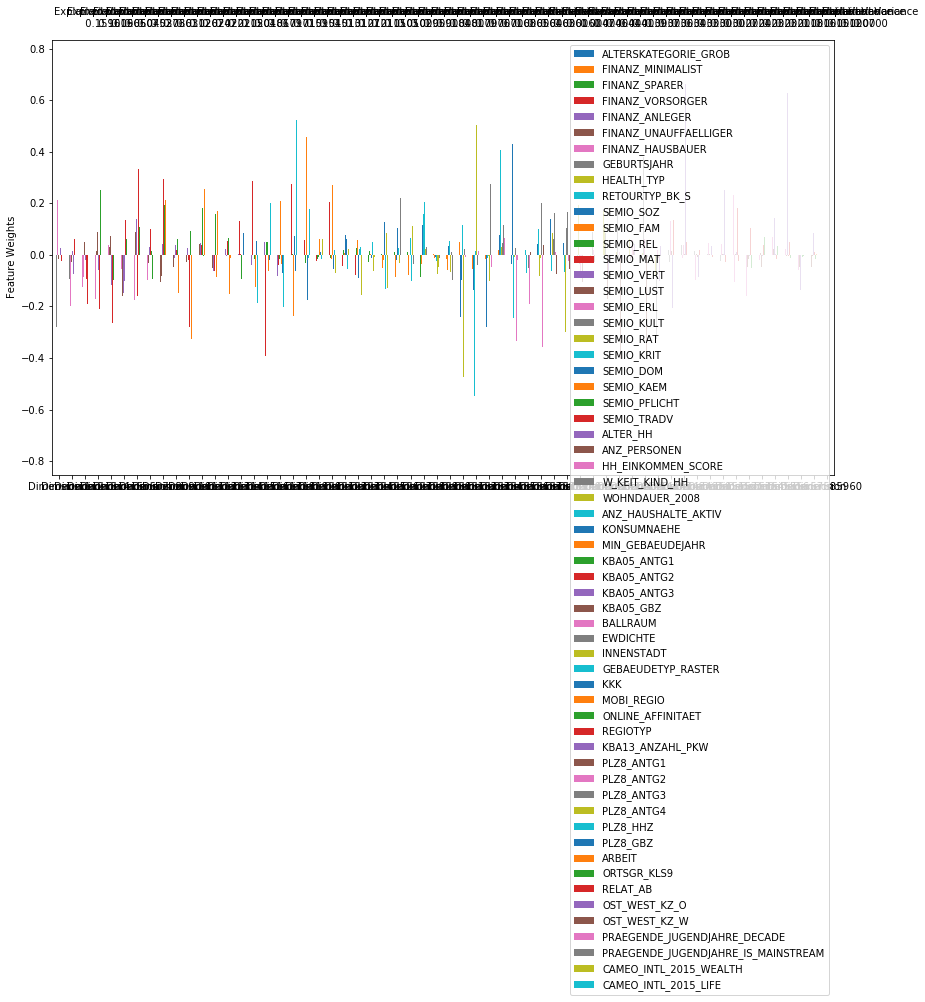

In [55]:
# Investigate the variance accounted for by each principal component.

pca_results(new_azdias, pca)

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Using 26 components, we can explain 0.8534999999999999% of the variability in the original data.


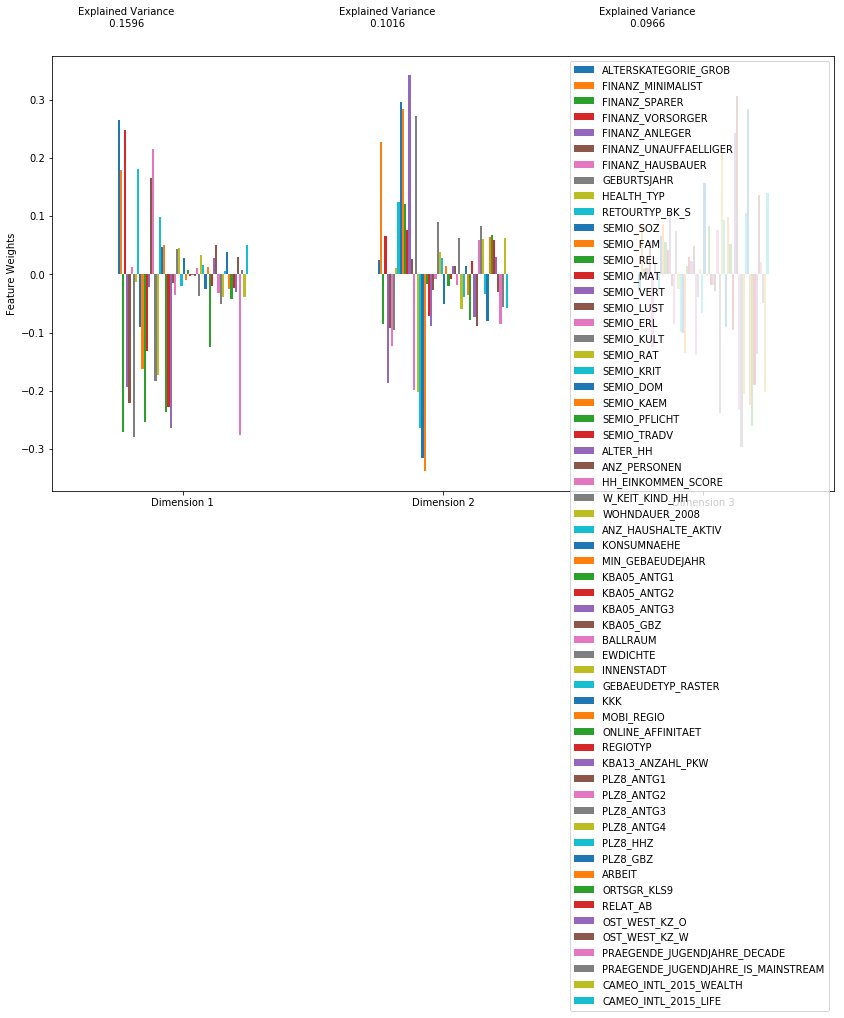

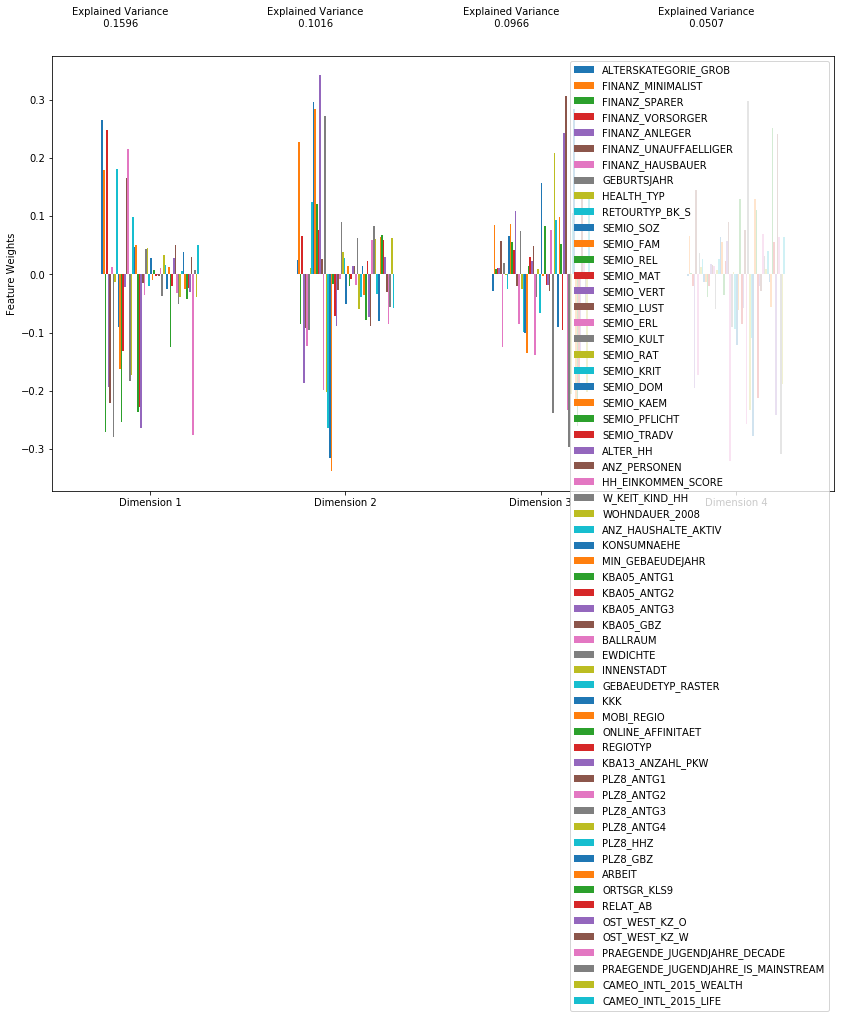

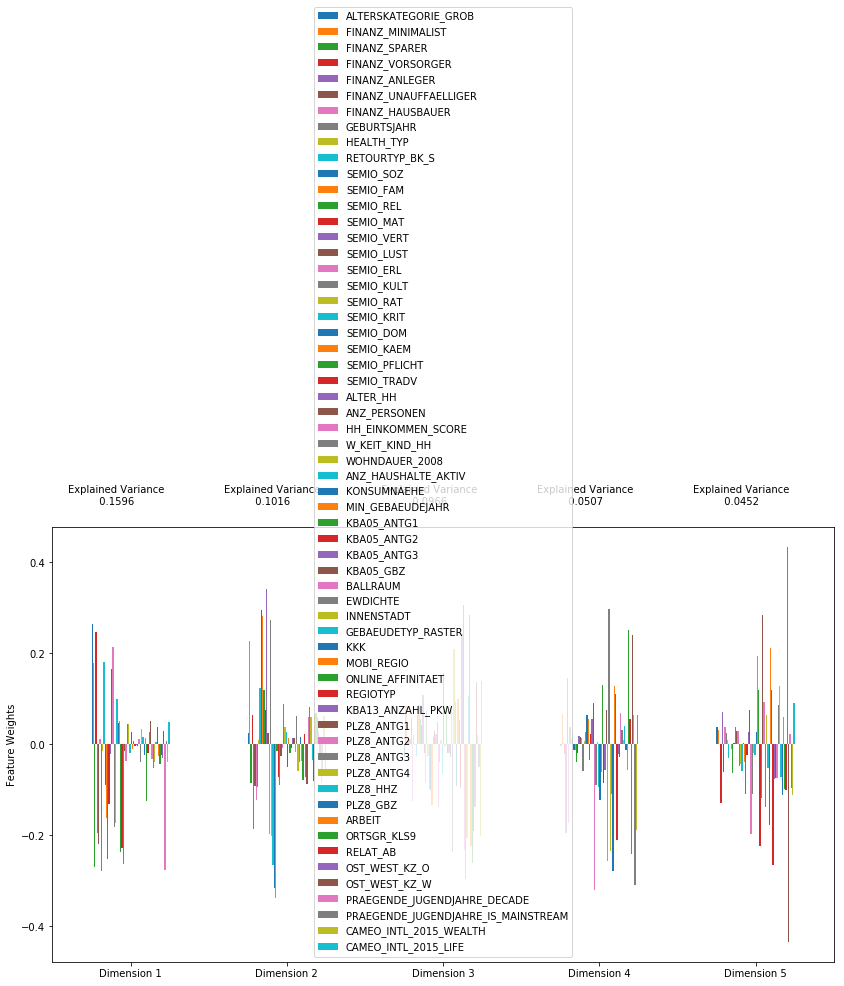

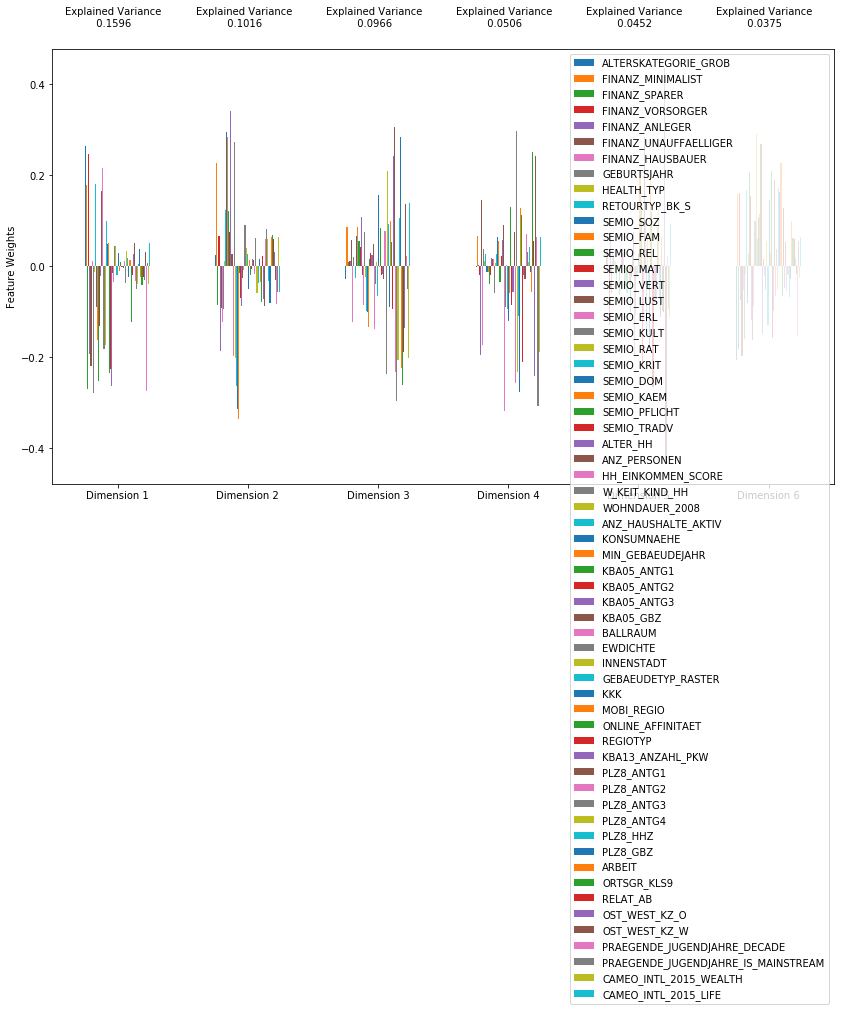

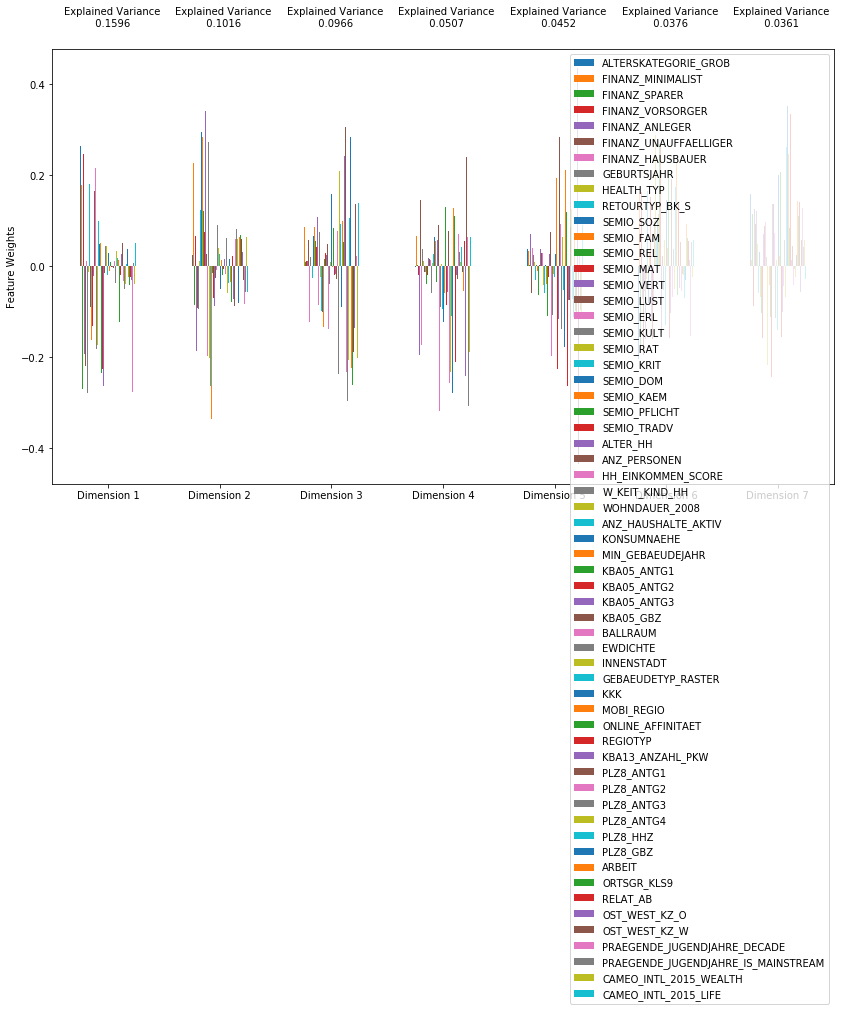

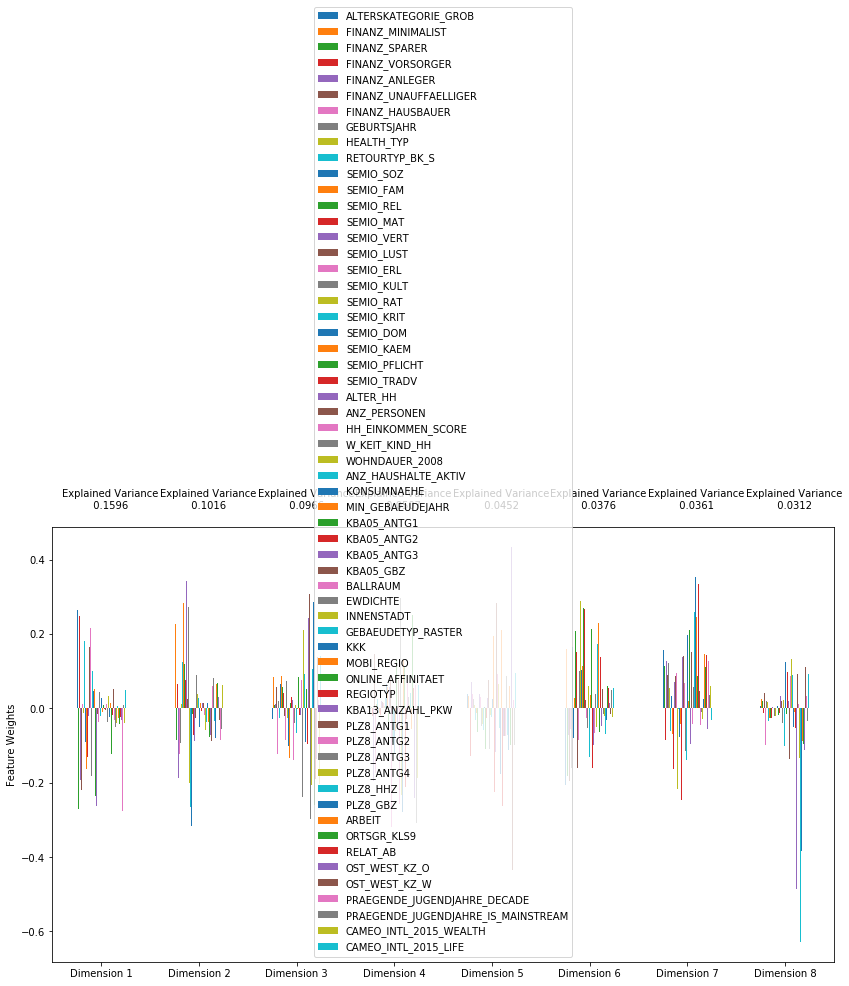

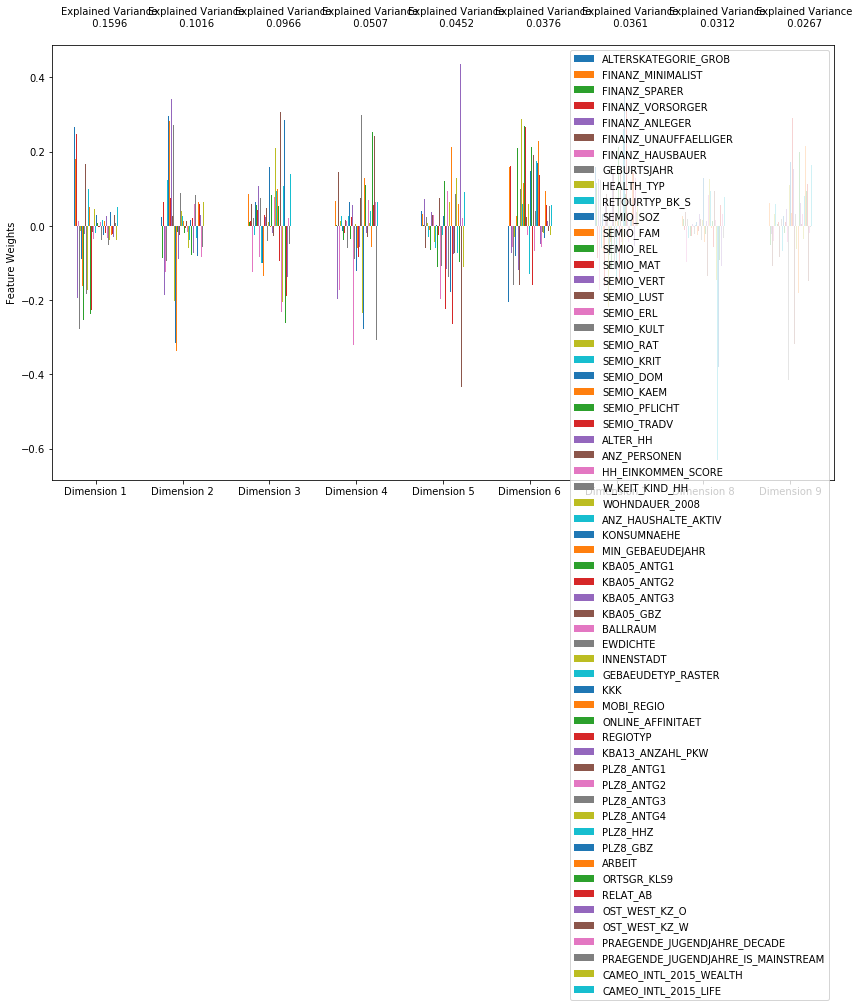

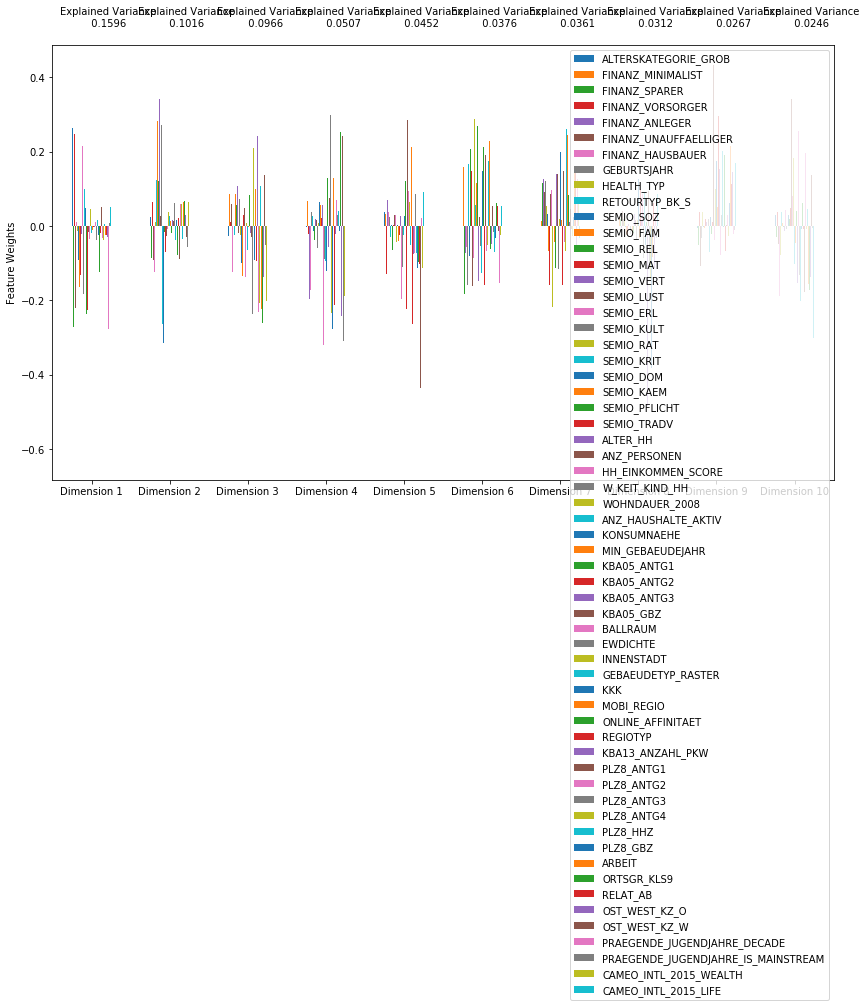

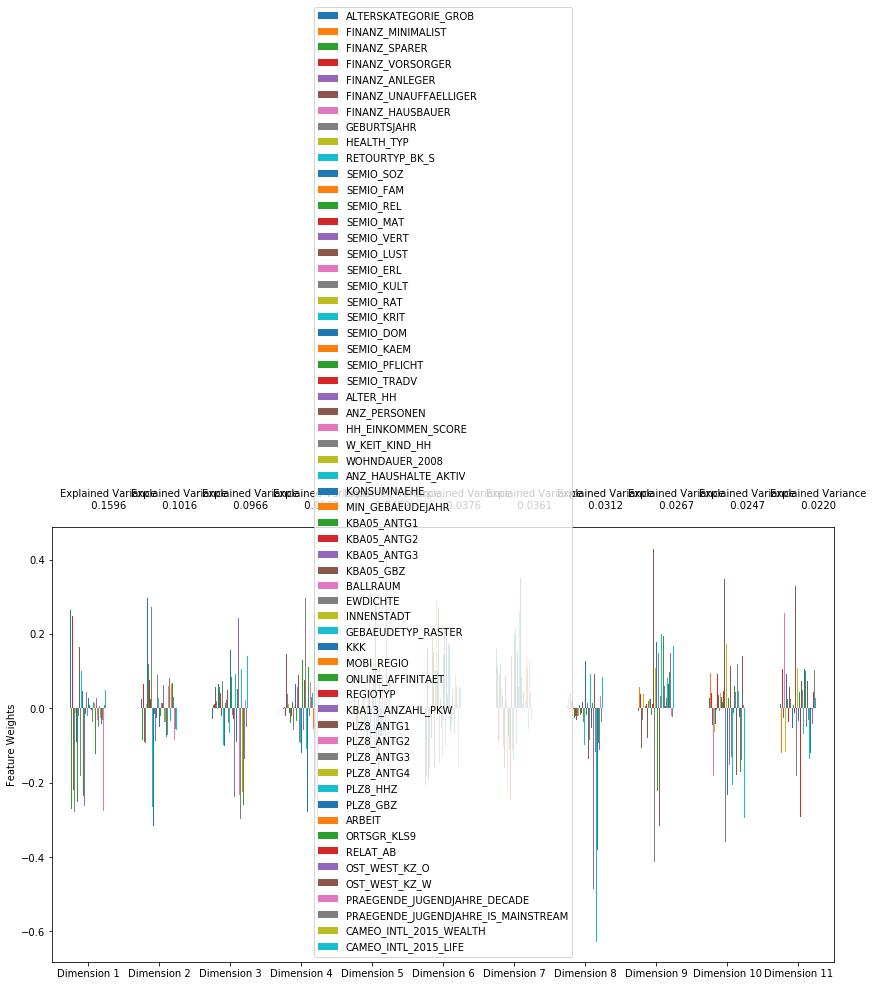

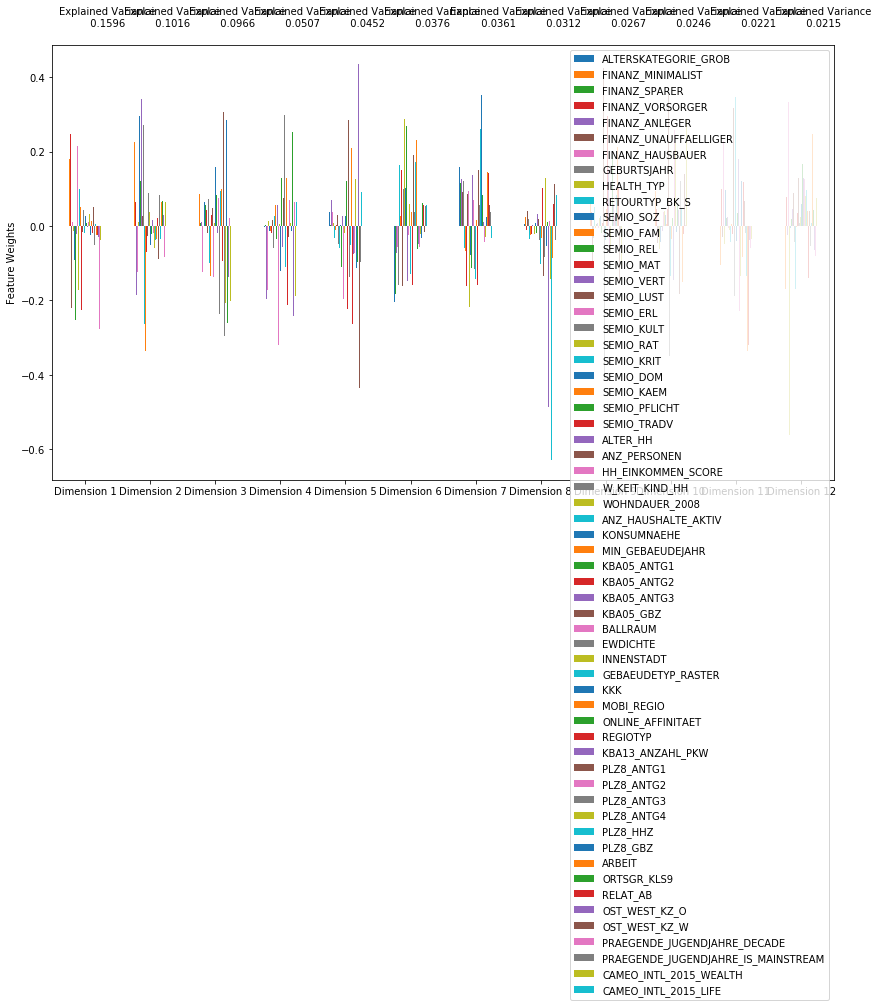

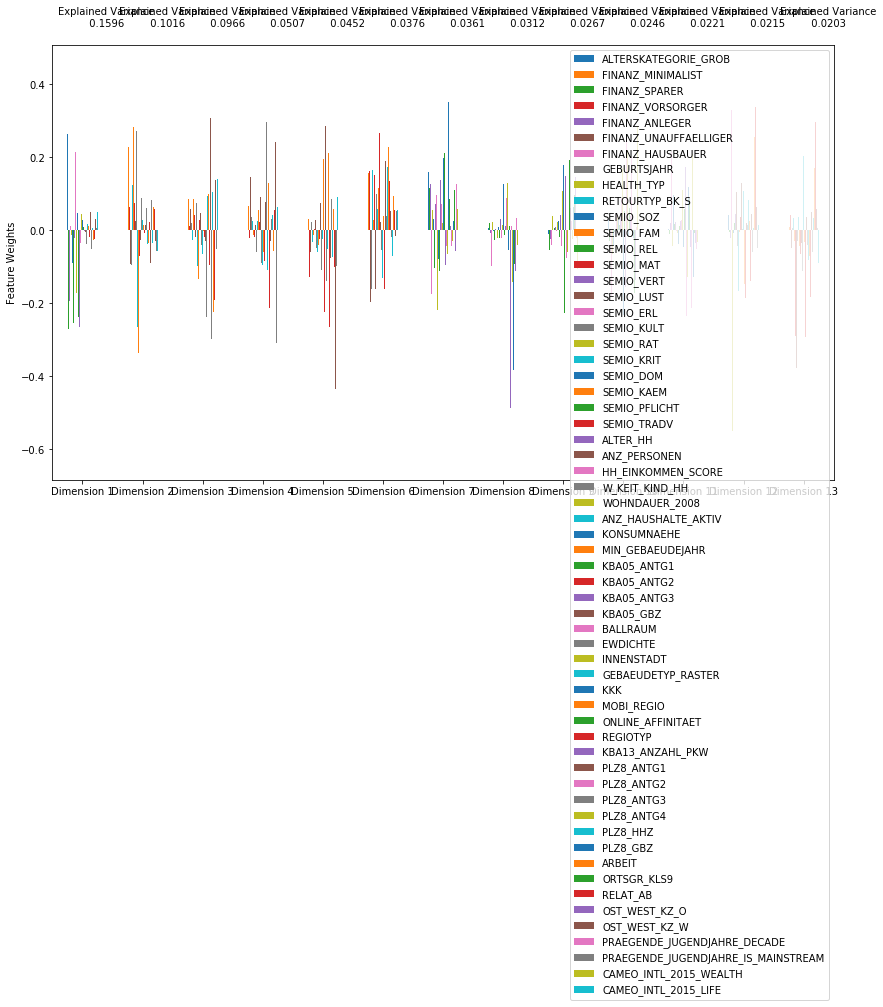

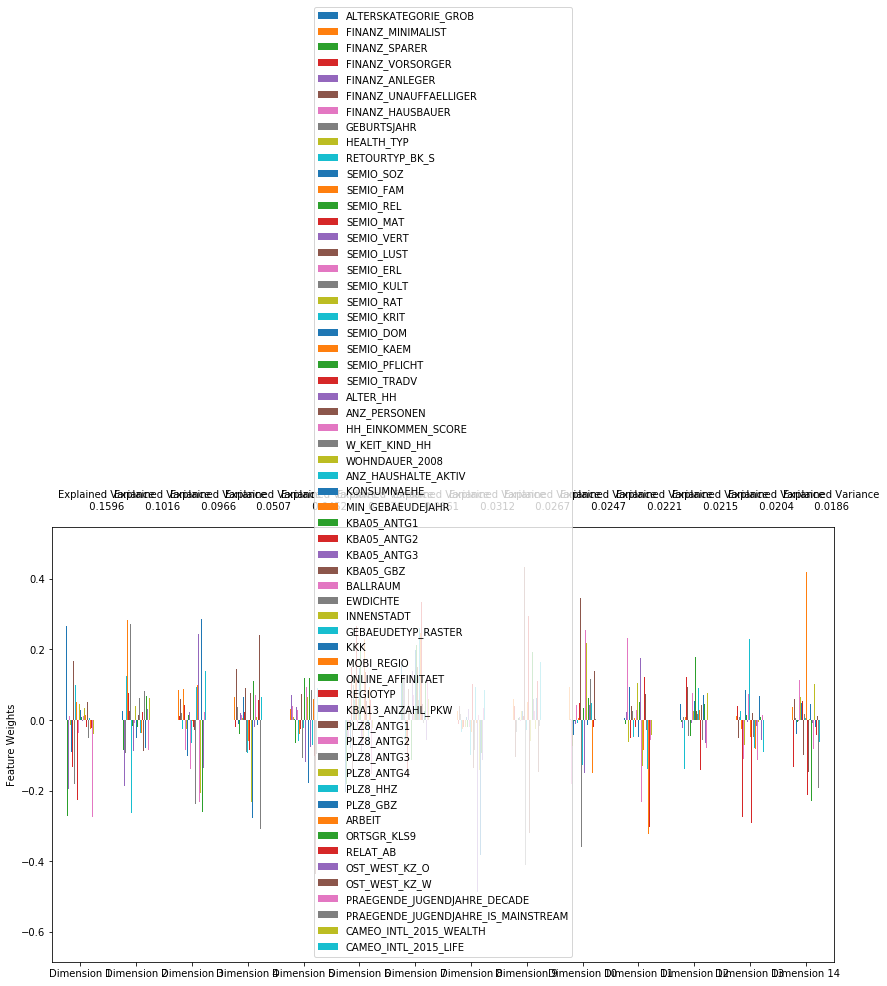

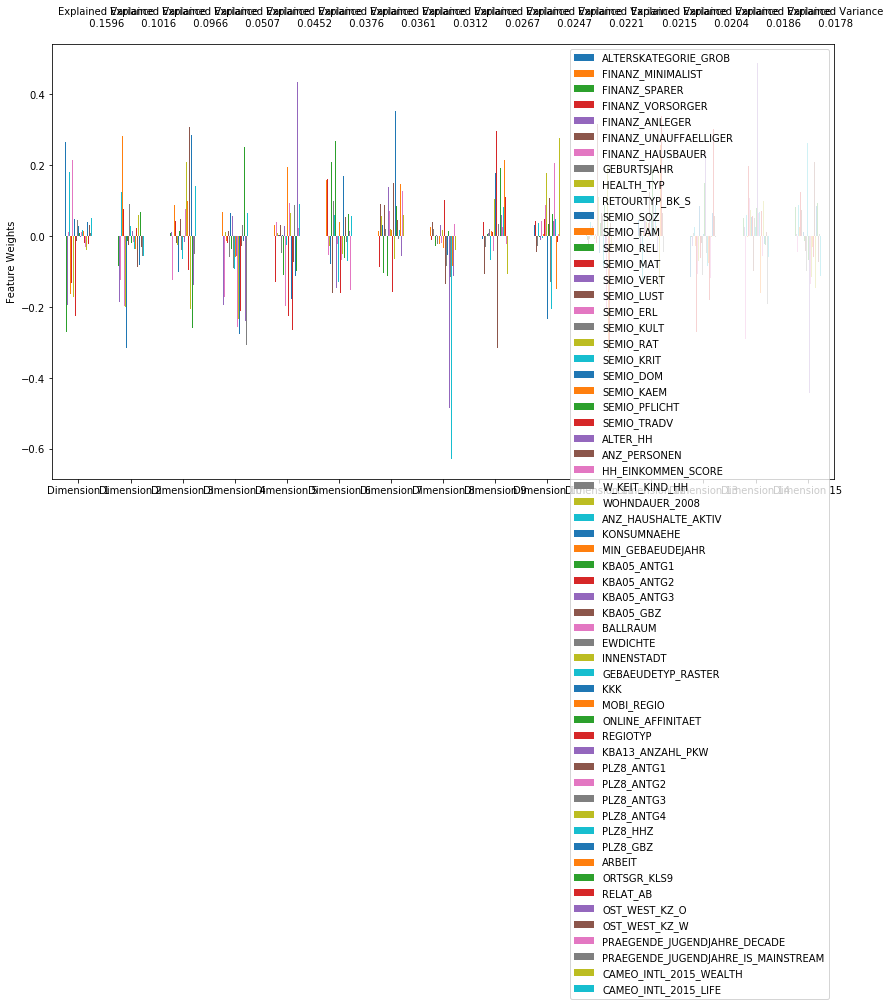

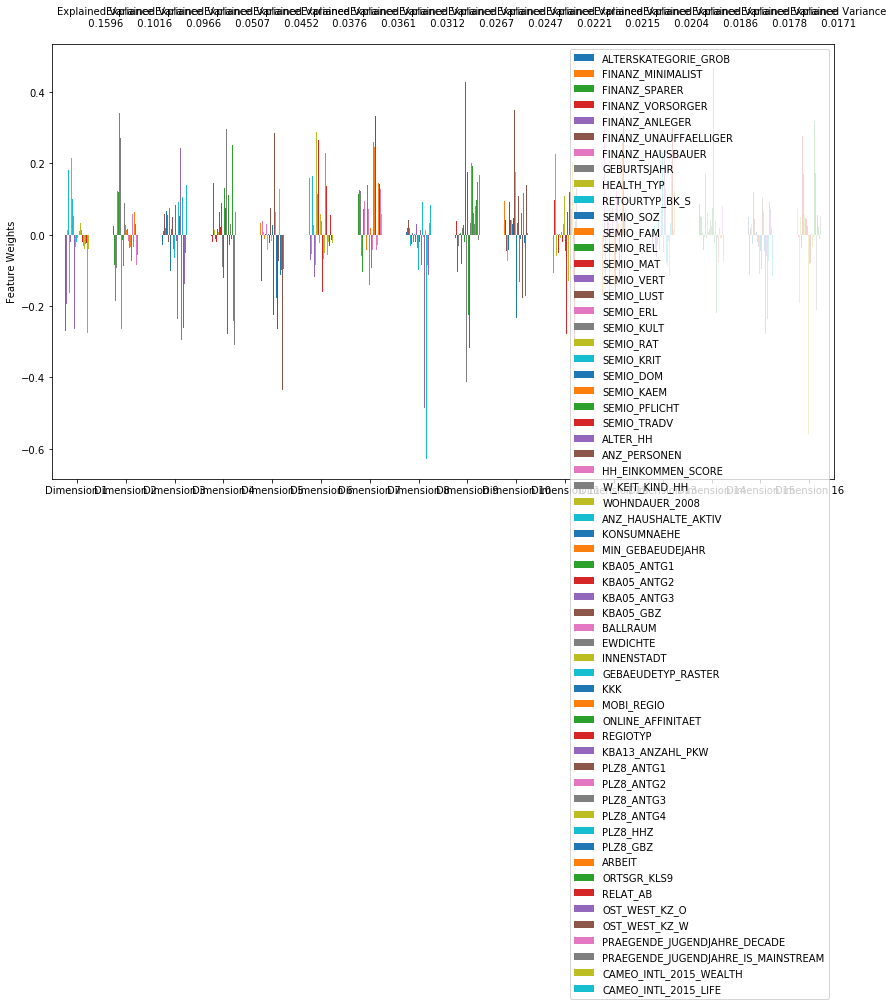

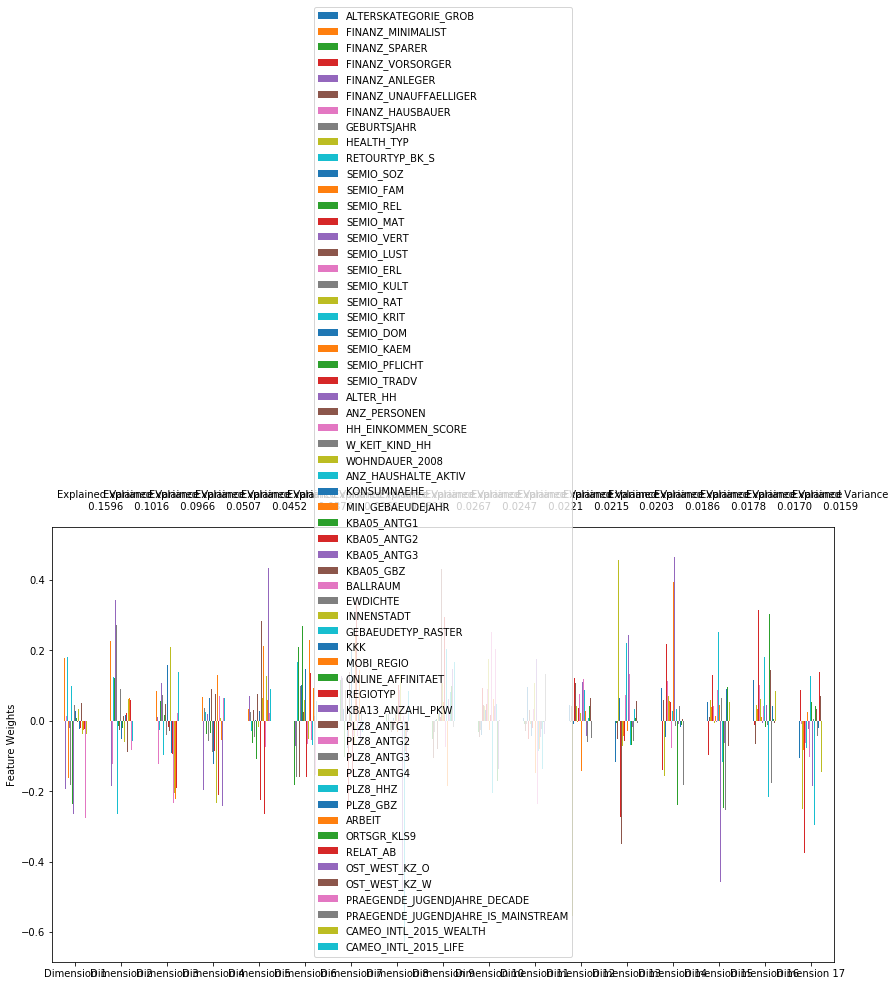

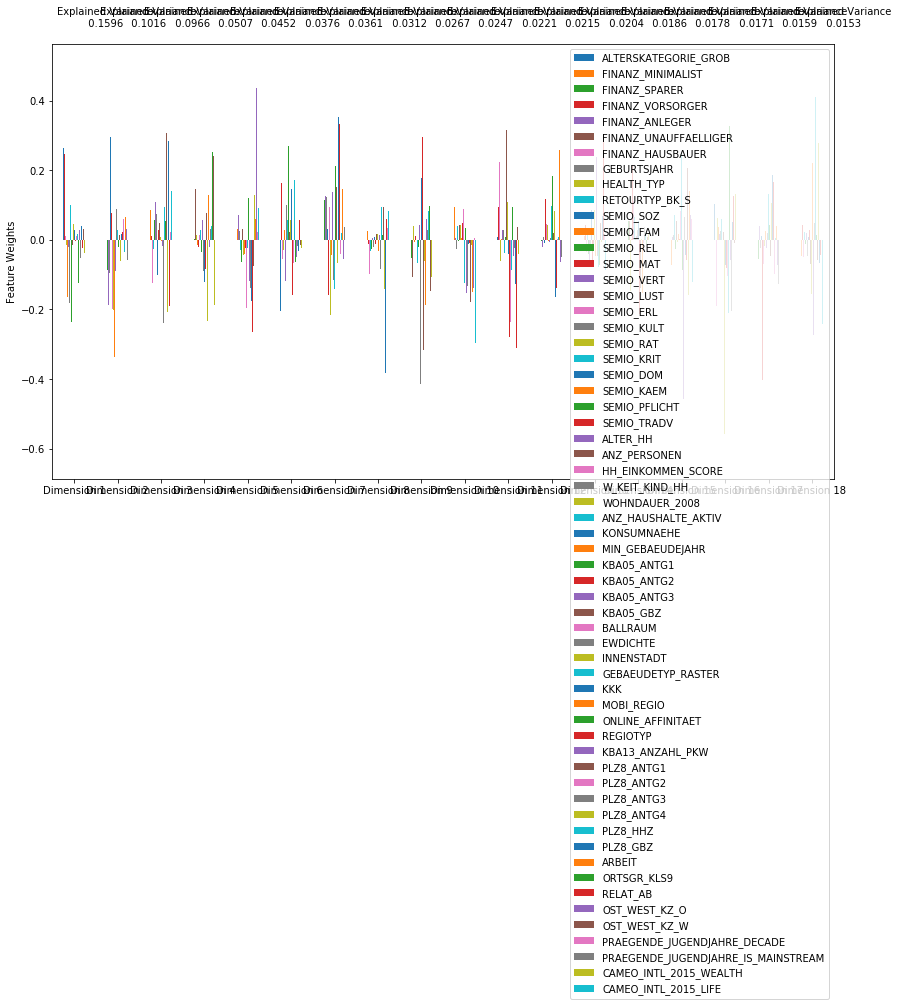

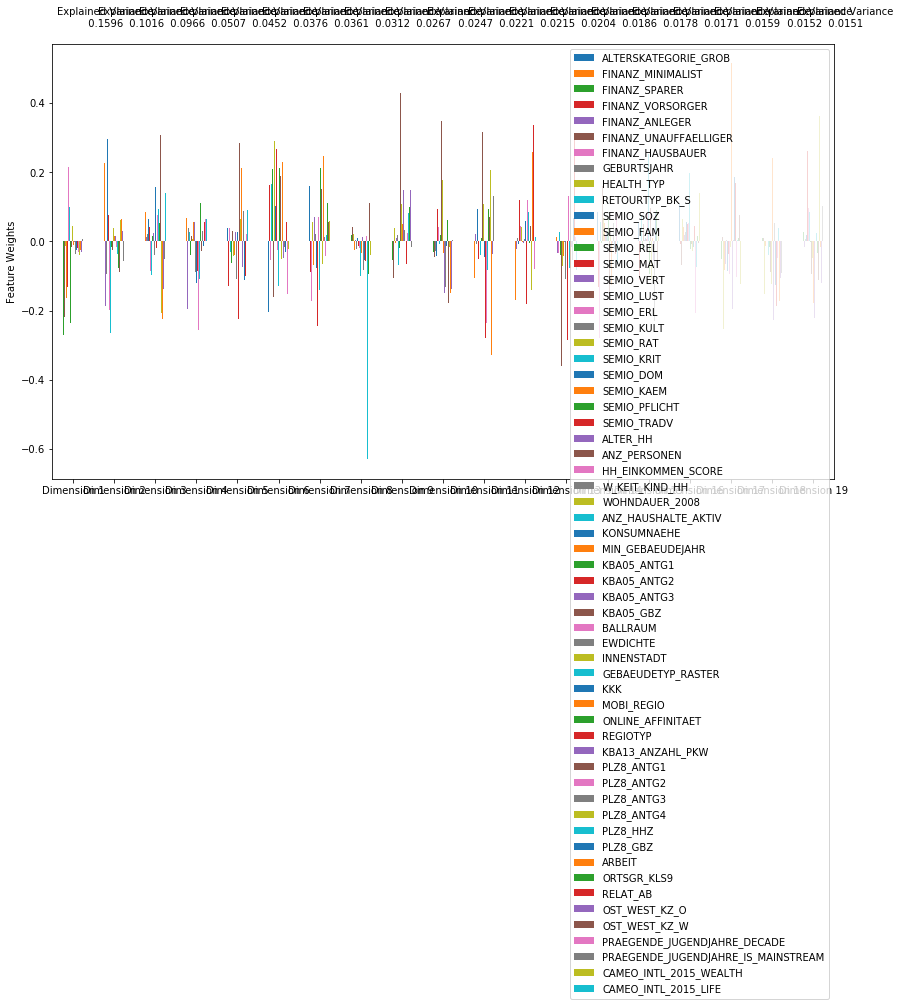

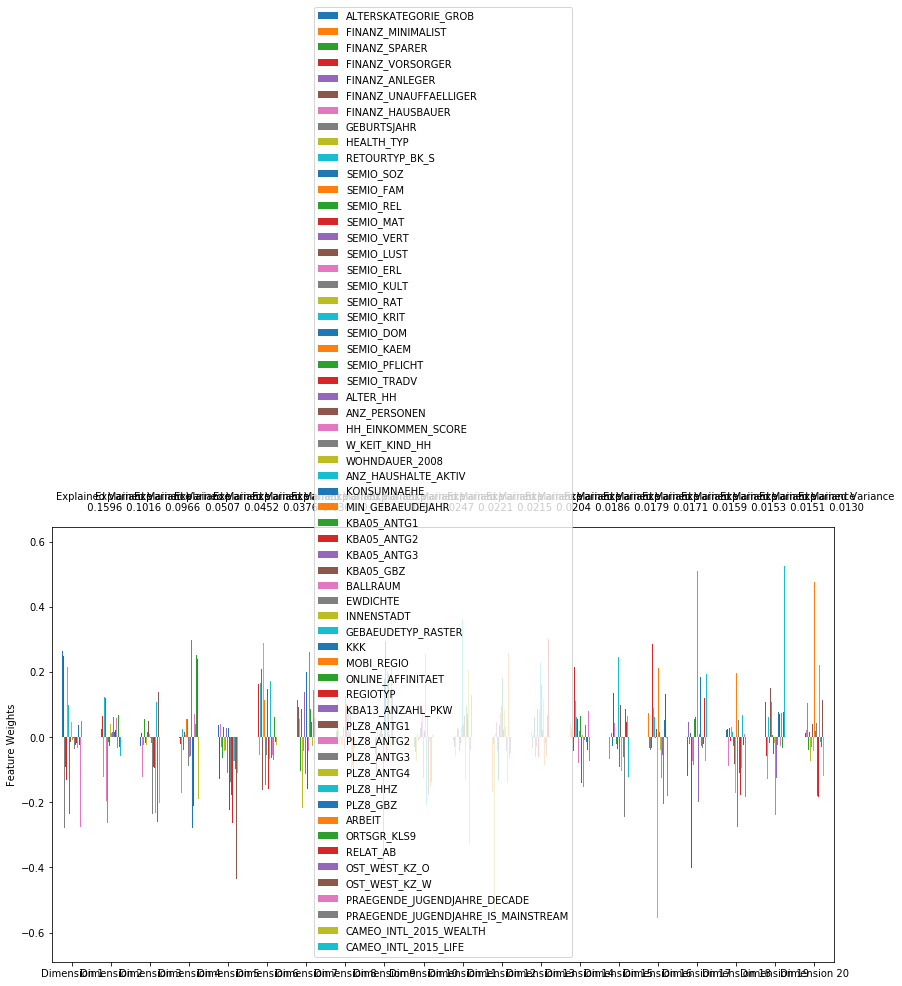

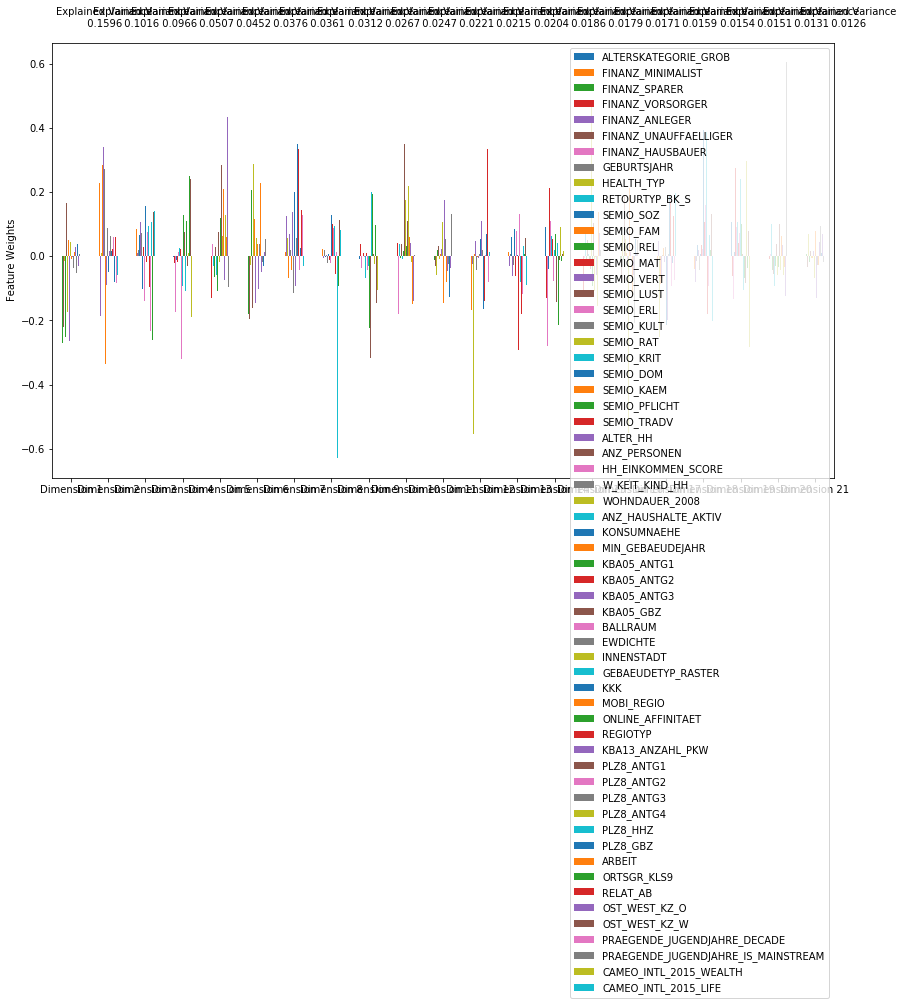

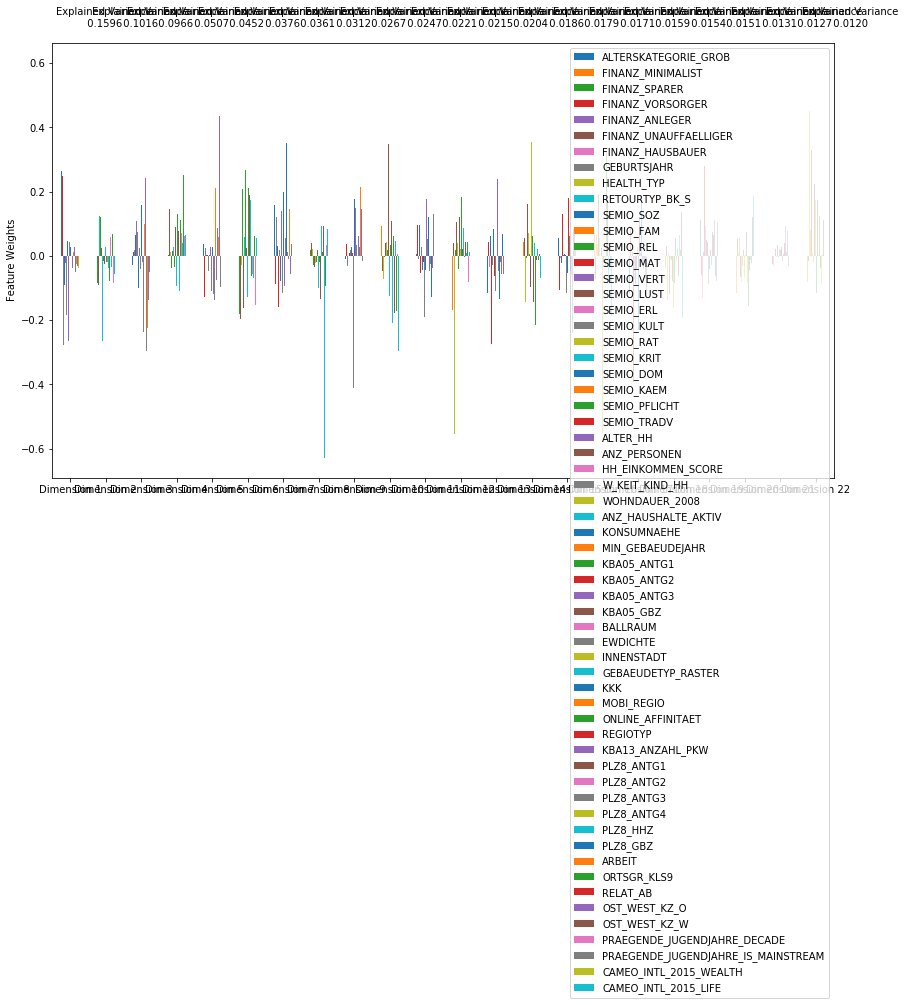

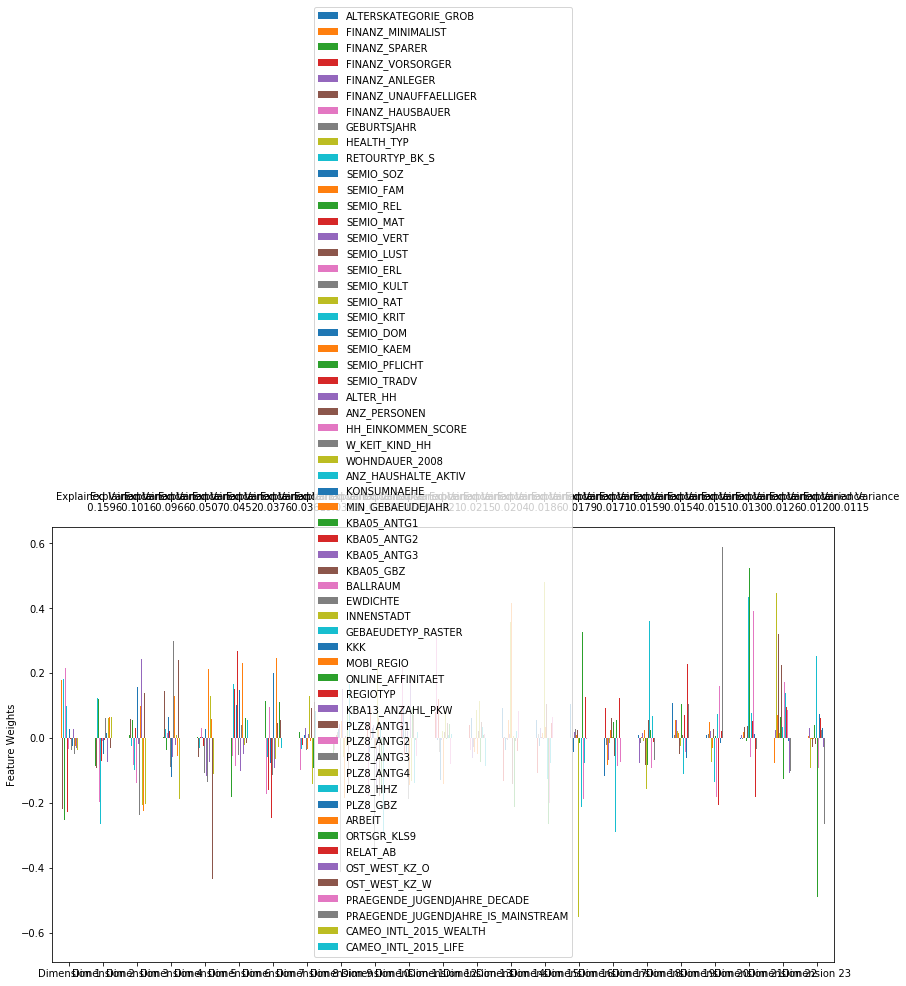

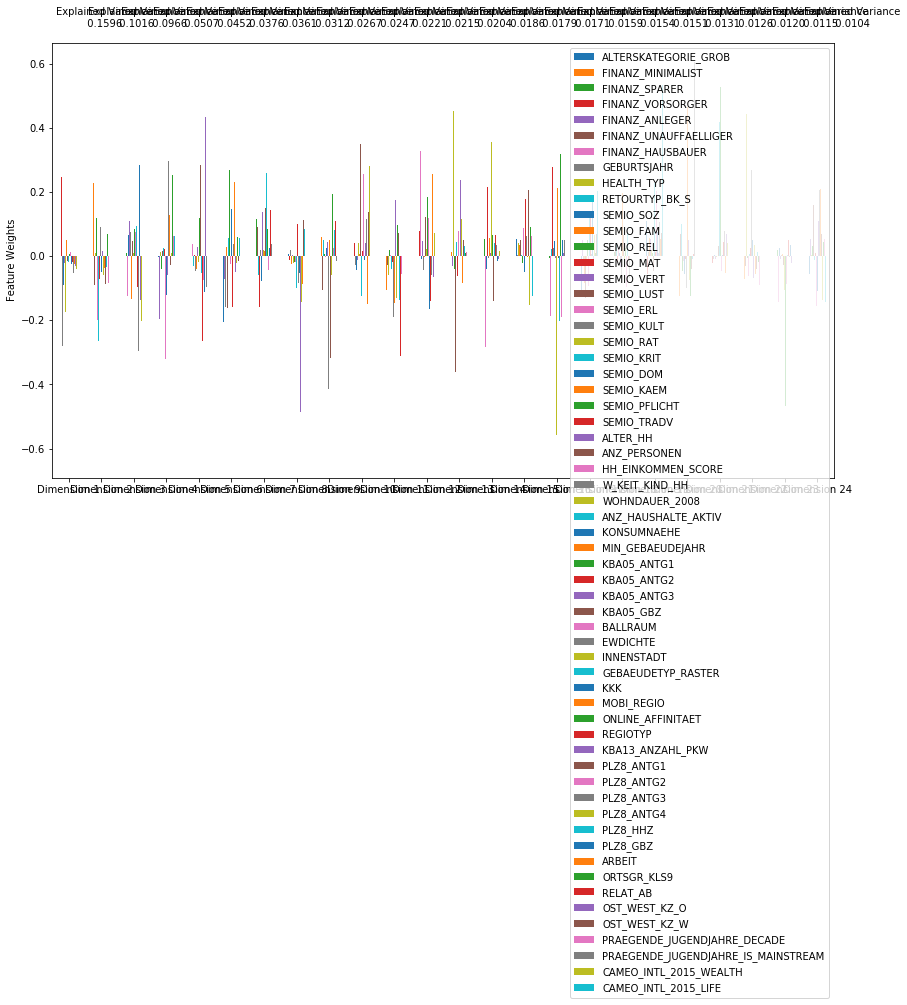

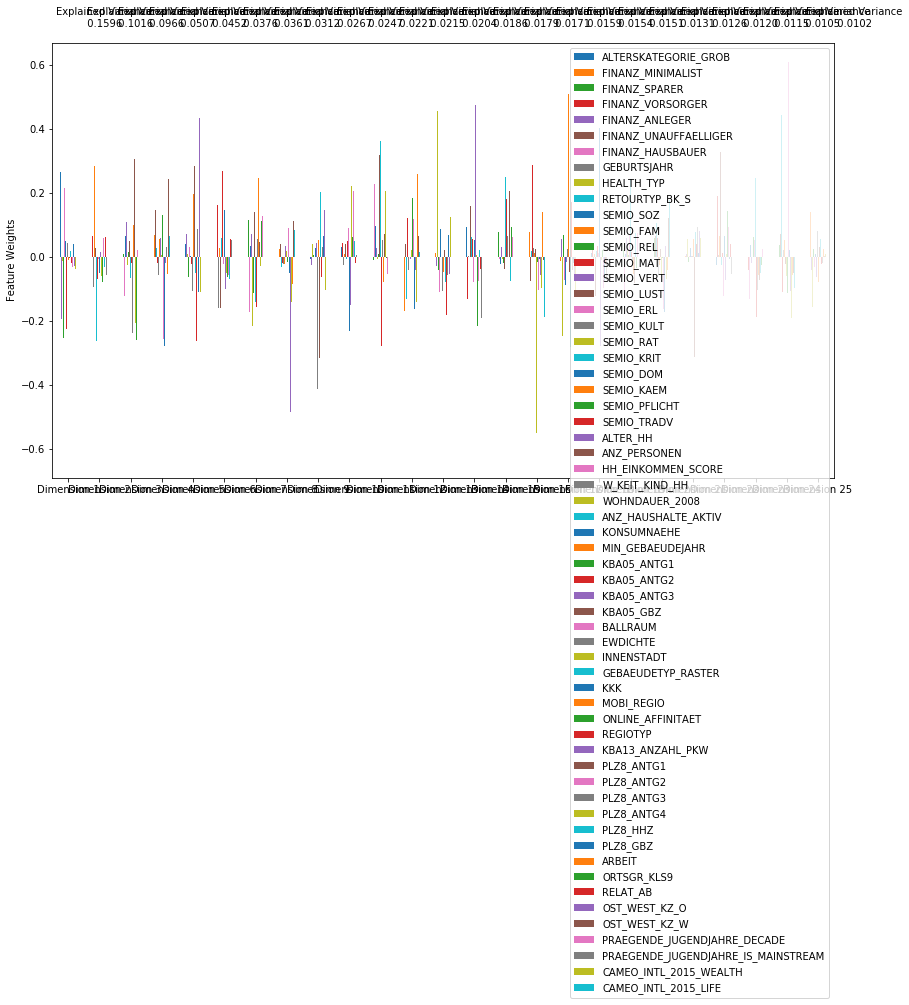

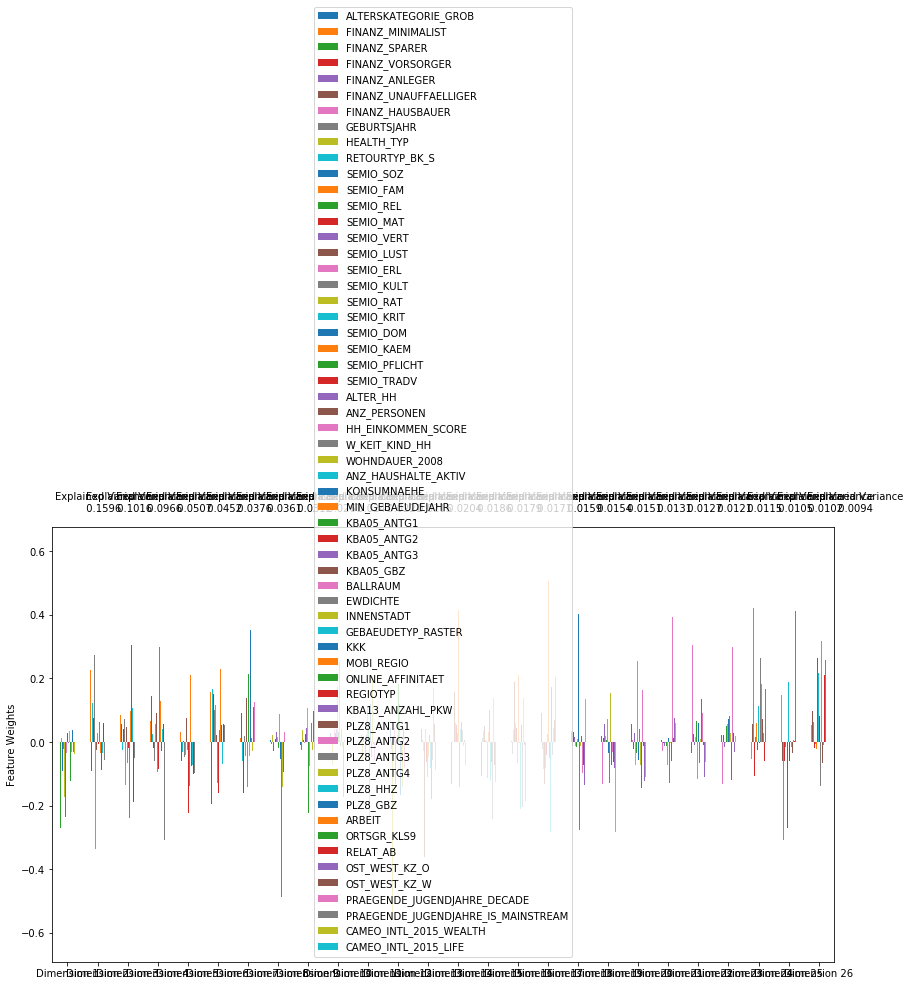

In [56]:
for comp in range(3, new_azdias.shape[1]):
    pca, X_pca = doPCA(new_azdias, comp)
    comp_check = pca_results(new_azdias, pca)
    if comp_check['Explained Variance'].sum() > 0.85:
        break
        

num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(comp_check.shape[0],comp_check['Explained Variance'].sum()))

In [57]:
# Re-apply PCA to the data while selecting for number of components to retain.
# 
#From the above analysis, I will choose 26 components for my PCA

pca, X_pca = doPCA(new_azdias, 26)

X_pca = pca.fit_transform(scaler)

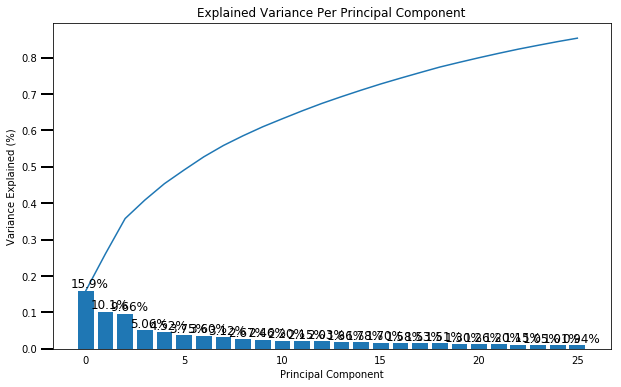

In [58]:
def scree_plot(pca):
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    
scree_plot(pca)

### Discussion 2.2: Perform Dimensionality Reduction

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding dimensionality reduction. How many principal components / transformed features are you retaining for the next step of the analysis?)

###### Answer:
I tried multiple components above, and decided 26 components are good enough, I can explain more than 85% of the original data's variability, which is good enough.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

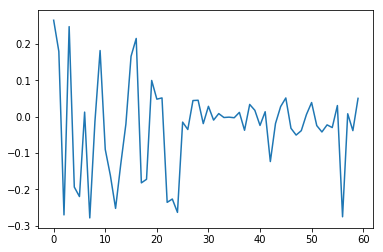

In [59]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
def map_weights(pca, comp):
    plt.plot(pca.components_[comp])
    plt.show()

    
map_weights(pca, 0)

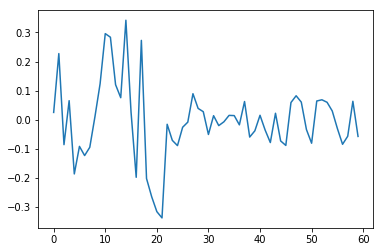

In [60]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

map_weights(pca, 1)

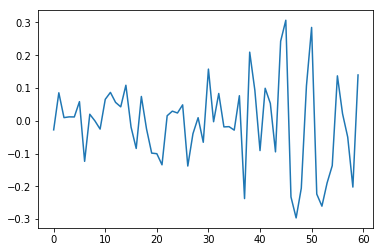

In [61]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

map_weights(pca, 2)

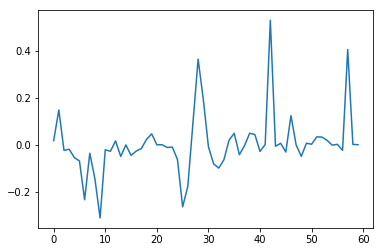

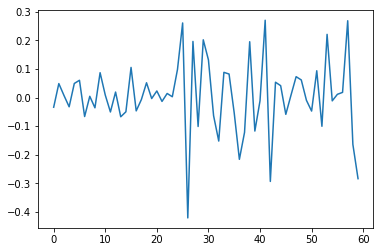

In [62]:
# I tried 24 and 25 for comparison only
map_weights(pca, 24)
map_weights(pca, 25)


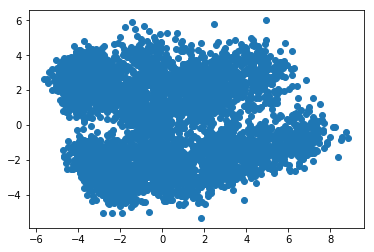

In [142]:
PCA_components = pd.DataFrame(X_pca)

plt.scatter(PCA_components[0], PCA_components[1])

### Discussion 2.3: Interpret Principal Components

(Double-click this cell and replace this text with your own text, reporting your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?)

###### ANSWER:
I noticed the values differ less in the first few components compared to later ones like 24 and 25?   
I think that's because first few ones are more significant

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [64]:
# Over a number of different cluster counts...
from sklearn.cluster import KMeans

# I tried n_clusters but the higher I go, the longer it takes, so I will stick with few tries below this cell
    # run k-means clustering on the data and...
# for i in range(1,55):
#     kmeans = KMeans(n_clusters=i, random_state=42).fit(X_pca)
#     if kmeans.score(X_pca) >= 0:
#     print(kmeans.score(pca))



    # compute the average within-cluster distances.
    

In [65]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.

n = range(1,100)

score = []

for i in n:
    kmeans = KMeans(n_clusters=i, random_state=42).fit(X_pca)
    score.append(kmeans.inertia_)
print("DONE")

DONE


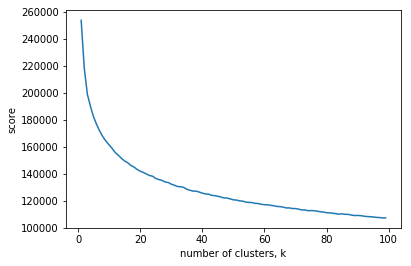

In [66]:
plt.plot(n, score)
plt.xlabel('number of clusters, k')
plt.ylabel('score')
plt.show()

#I woul say 25 clusters seems to be the elbow point 

In [67]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

kmeans = KMeans(n_clusters=25, random_state=42).fit(X_pca)

### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

###### Answer:
I decided to segment the population with 25 clusters, I think this is the elbow point (it's a bit hard to tell, since the curve is too smooth for the naked eye)
I also made sure ti have random_state = 42 for your review.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [68]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')

customers

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0              2                     4          1            5.0   
1             -1                     4          1            NaN   
2             -1                     4          2            2.0   
3              1                     4          1            2.0   
4             -1                     3          1            6.0   
5              1                     3          1            4.0   
6              2                     4          1            2.0   
7              1                     4          1            2.0   
8              2                     4          2            1.0   
9              1                     3          1            3.0   
10            -1                     3          2            5.0   
11             1                     4          1            3.0   
12            -1                     4          1            5.0   
13            -1                     3          1            6.0   
14             2                     4          2            2.0   
15             2                     3          1            3.0   
16             1                     4          1            2.0   
17            -1                     4          1            5.0   
18            -1                     2          1            4.0   
19            -1                     4          2            4.0   
20            -1                     4          1            6.0   
21             2                     4          1            1.0   
22             2                     1          2            2.0   
23            -1                     3          1            6.0   
24             2                     4          2            2.0   
25            -1                     3          2            3.0   
26             1                     4          2            2.0   
27            -1                     3          1            3.0   
28             2                     4          2            2.0   
29             0                     3          2            4.0   
...          ...                   ...        ...            ...   
191622         2                     4          1            2.0   
191623         1                     4          1            2.0   
191624         1                     4          1            2.0   
191625         2                     4          2            4.0   
191626        -1                     2          1            4.0   
191627         3                     3          2            2.0   
191628         1                     4          1            2.0   
191629         2                     4          2            1.0   
191630         2                     3          1            2.0   
191631         2                     4          2            1.0   
191632         0                     3          1            5.0   
191633         1                     4          1            3.0   
191634         2                     3          1            1.0   
191635         2                     4          2            2.0   
191636         2                     4          1            1.0   
191637        -1                     3          2            6.0   
191638         1                     4          1            6.0   
191639        -1                     3          1            5.0   
191640         3                     3          1            4.0   
191641         1                     4          1            2.0   
191642         2                     4          2            2.0   
191643         2                     4          1            5.0   
191644         2                     4          2            6.0   
191645         2                     4          1            5.0   
191646         3                     2          2            2.0   
191647         1                     3          1            4.0   
191648        -1                     4          2            2.0

In [69]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
customers = clean_data(customers)
customers

ALTERSKATEGORIE_GROB  FINANZ_MINIMALIST  FINANZ_SPARER  \
1466                     1.0                  1              4   
2502                     4.0                  3              1   
2930                     1.0                  5              1   
3468                     3.0                  1              3   
3576                     3.0                  2              4   
3660                     3.0                  1              5   
3710                     2.0                  4              3   
4142                     3.0                  3              2   
4285                     1.0                  1              5   
4487                     4.0                  3              1   
4502                     3.0                  4              2   
4680                     3.0                  5              3   
5701                     4.0                  4              1   
6747                     4.0                  5              3   
7228                     2.0                  2              5   
7718                     3.0                  3              3   
7934                     4.0                  3              2   
8122                     1.0                  1              4   
8760                     4.0                  4              1   
8773                     1.0                  1              5   
8774                     3.0                  3              1   
8822                     4.0                  2              1   
9853                     3.0                  3              1   
10422                    3.0                  5              3   
10692                    3.0                  2              3   
10993                    1.0                  1              4   
11288                    3.0                  3              1   
14313                    4.0                  4              1   
14759                    3.0                  3              1   
15791                    1.0                  3              1   
...                      ...                ...            ...   
172101                   4.0                  4              2   
172965                   2.0                  1              4   
173002                   4.0                  3              2   
174977                   3.0                  5              2   
175640                   4.0                  4              1   
175720                   2.0                  4              2   
176911                   2.0                  4              2   
178212                   3.0                  5              1   
180140                   3.0                  5              1   
180226                   4.0                  4              1   
180330                   4.0                  4              2   
182367                   4.0                  4              4   
182859                   4.0                  3              3   
183082                   1.0                  4              2   
183359                   4.0                  4              1   
183612                   3.0                  3              1   
185558                   3.0                  4              1   
186666                   4.0                  4              1   
188939                   3.0                  2              5   
189772                   2.0                  3              3   
189850                   4.0                  2              5   
189902                   4.0                  4              1   
190665                   4.0                  5              2   
190720                   4.0                  3              1   
191076                   2.0                  2              4   
191584                   4.0                  4              2   
191629                   4.0                  2              1   
28453                    3.0                  3              1   
148160                   4.0                  4 

In [70]:
customers_pca, customers_X_pca = doPCA(customers, 26)

customers_predict = kmeans.predict(customers_X_pca)
customers_predict

array([ 7, 18, 15, 12,  5, 12, 24, 19,  3, 19, 22,  5,  9,  5, 24, 22, 14,
        3, 18,  7,  9, 19, 19,  5,  7,  3,  1, 18,  1, 18,  0, 22, 18, 11,
       24, 15, 19, 19, 14,  5, 12,  7,  8, 18,  4,  7,  7, 19, 19,  0, 19,
       23,  0, 18,  7, 23, 22,  6, 11, 18, 17, 11, 17, 19, 19,  1, 24,  5,
       14, 24, 10, 19,  0, 11, 24, 17,  5, 19, 22,  8, 19, 19, 21, 19, 19,
       12,  9, 13, 23, 13, 11, 14,  5,  3,  5,  5,  7,  1, 20, 10, 13,  7,
        0, 18, 22,  1,  9,  5, 13,  7, 21, 23, 20,  5,  0, 17, 17, 23, 12,
        7,  7,  6, 24, 18,  0, 18,  5, 17,  5,  1, 11,  3,  7, 11,  3,  1,
       13, 22, 17, 18, 22, 13, 18, 24, 24, 10,  9,  9,  3, 19, 13, 20,  9,
       13,  7,  1, 14, 16, 17, 19, 19,  3, 24,  3,  1, 18, 11,  7, 14, 17,
        7, 10, 12,  3, 11, 13, 19, 24,  1, 24,  9,  4, 23,  1, 18, 11,  3,
       24,  7, 12, 22, 12, 24, 18, 17, 17, 19, 11, 19, 11, 22,  0, 19,  9,
       18, 21, 19,  9, 10, 18, 22, 22,  3, 19, 17, 17,  5, 22, 18, 19, 11,
       18, 24, 18,  9,  1

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

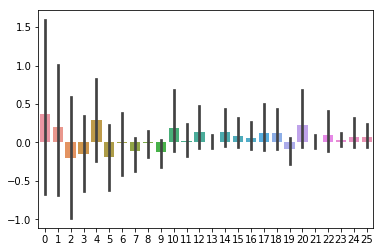

In [121]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

# First few clusters seems to have more
sns.barplot(data=kmeans.cluster_centers_)

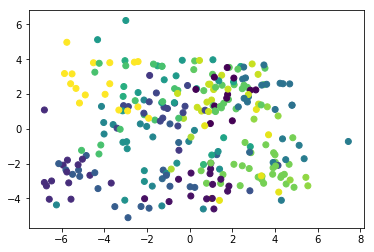

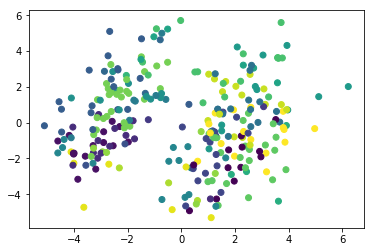

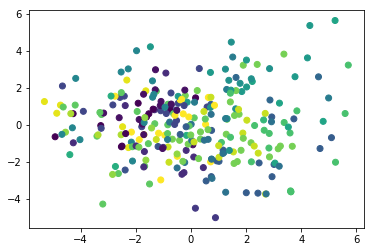

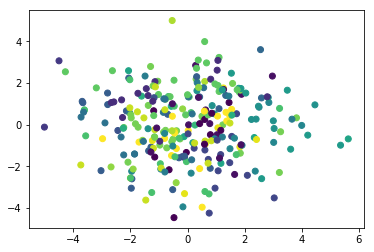

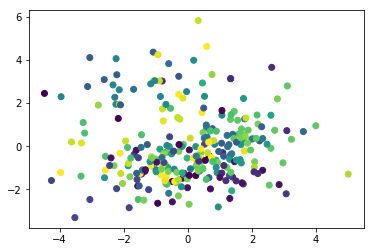

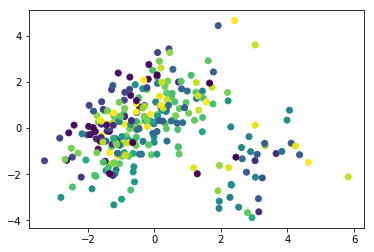

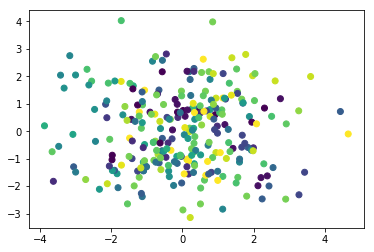

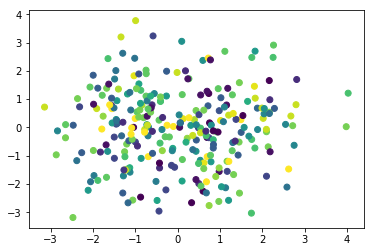

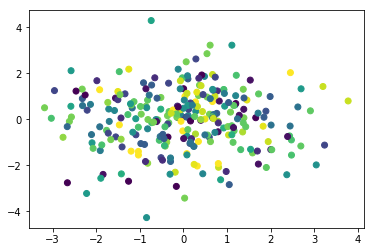

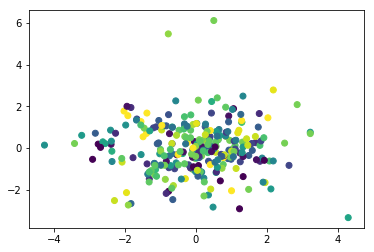

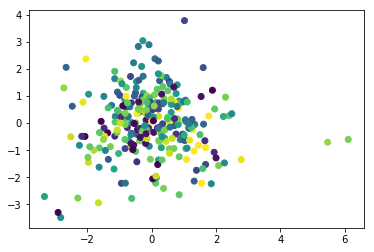

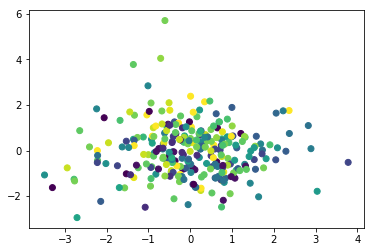

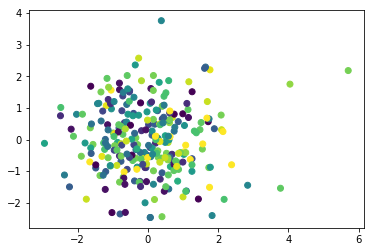

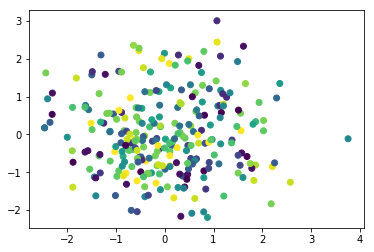

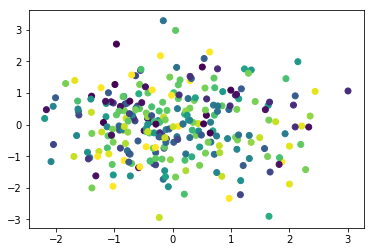

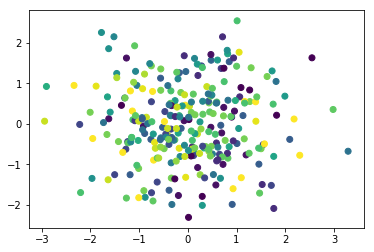

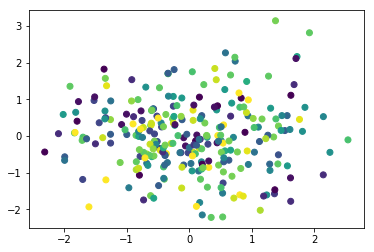

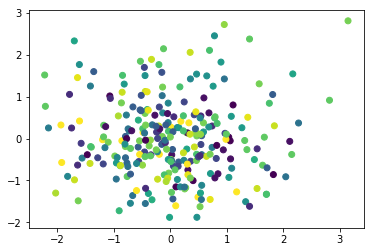

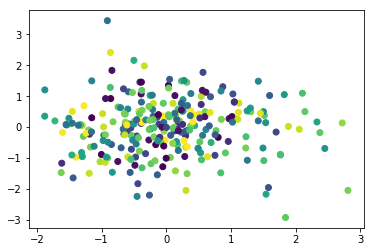

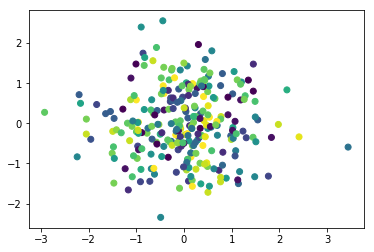

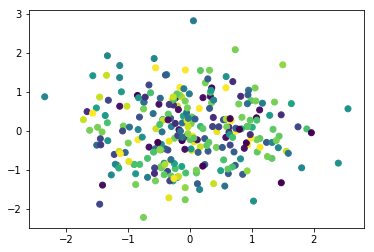

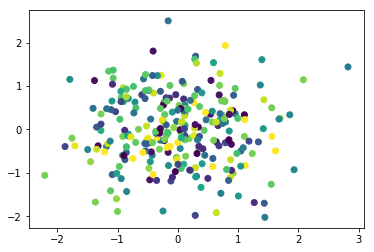

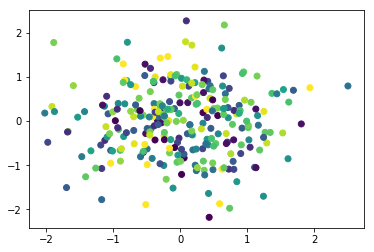

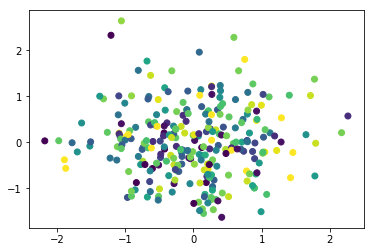

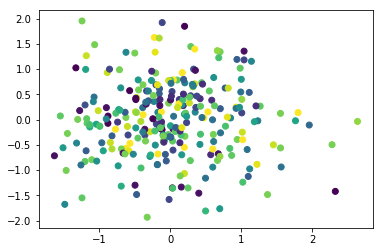

In [158]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
# figure(figsize=(20, 10), dpi=80)
# plt.plot(customers_predict)
# plt.show()
Customer_PCA_components = pd.DataFrame(customers_X_pca)

for i in range(0,25):
    plt.scatter(Customer_PCA_components[i], Customer_PCA_components[i+1], c=customers_predict)
    plt.show()
#I think the first cluster is overrepresented

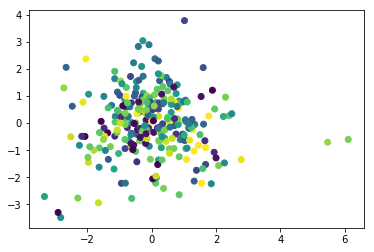

In [160]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
plt.scatter(Customer_PCA_components[10], Customer_PCA_components[11], c=customers_predict)
plt.show()
#Cluster number 11 is underrepresented

### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)


From my observation, FINANZ_ANLEGER seems to have a lot of effect on the customers, so the segment of population with higher value of FINANZ_ANLEGER will be more likely to be popular with the mail-order company

MIN_GEBAEUDEJAHR is relatively unpopular in my opinion.

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.